In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro

# **HOMICIDIOS**
---



HOMICIDIOS_VICTIMAS

In [2]:
with pd.ExcelFile('Data/Data_bruta/homicidios.xlsx') as xls:
    tana = xls.sheet_names

        Vamos a transformar este archivo, sobre todo para evitar los datos faltantes

In [3]:
tana

['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS', 'clas']

In [4]:
homicidios_victimas = pd.read_excel('Data/Data_bruta/homicidios.xlsx', sheet_name=tana[2])

In [5]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [6]:
homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [7]:
homicidios_victimas['ID_hecho'].unique()

array(['2016-0001', '2016-0002', '2016-0003', '2016-0004', '2016-0005',
       '2016-0008', '2016-0009', '2016-0010', '2016-0012', '2016-0013',
       '2016-0015', '2016-0016', '2016-0017', '2016-0019', '2016-0020',
       '2016-0021', '2016-0022', '2016-0025', '2016-0026', '2016-0027',
       '2016-0028', '2016-0029', '2016-0031', '2016-0034', '2016-0035',
       '2016-0036', '2016-0037', '2016-0038', '2016-0039', '2016-0041',
       '2016-0043', '2016-0044', '2016-0045', '2016-0047', '2016-0048',
       '2016-0049', '2016-0050', '2016-0051', '2016-0052', '2016-0053',
       '2016-0054', '2016-0055', '2016-0056', '2016-0058', '2016-0059',
       '2016-0064', '2016-0065', '2016-0067', '2016-0068', '2016-0069',
       '2016-0073', '2016-0074', '2016-0075', '2016-0076', '2016-0077',
       '2016-0078', '2016-0079', '2016-0080', '2016-0081', '2016-0082',
       '2016-0083', '2016-0084', '2016-0085', '2016-0086', '2016-0087',
       '2016-0088', '2016-0089', '2016-0090', '2016-0092', '2016

In [8]:
homicidios_victimas[homicidios_victimas['ID_hecho']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [9]:
homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [10]:
homicidios_victimas['FECHA'].unique()

array(['2016-01-01T00:00:00.000000000', '2016-01-02T00:00:00.000000000',
       '2016-01-03T00:00:00.000000000', '2016-01-10T00:00:00.000000000',
       '2016-01-21T00:00:00.000000000', '2016-01-24T00:00:00.000000000',
       '2016-01-29T00:00:00.000000000', '2016-02-08T00:00:00.000000000',
       '2016-02-10T00:00:00.000000000', '2016-02-14T00:00:00.000000000',
       '2016-02-15T00:00:00.000000000', '2016-02-17T00:00:00.000000000',
       '2016-02-21T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-02T00:00:00.000000000', '2016-03-04T00:00:00.000000000',
       '2016-03-08T00:00:00.000000000', '2016-03-12T00:00:00.000000000',
       '2016-03-13T00:00:00.000000000', '2016-03-14T00:00:00.000000000',
       '2016-03-19T00:00:00.000000000', '2016-03-21T00:00:00.000000000',
       '2016-03-23T00:00:00.000000000', '2016-03-29T00:00:00.000000000',
       '2016-03-30T00:00:00.000000000', '2016-03-31T00:00:00.000000000',
       '2016-04-11T00:00:00.000000000', '2016-04-15

In [11]:
homicidios_victimas[homicidios_victimas['FECHA']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [12]:
homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [13]:
homicidios_victimas[homicidios_victimas['AAAA']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [14]:
homicidios_victimas[homicidios_victimas['MM']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [15]:
homicidios_victimas[homicidios_victimas['DD']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO


In [16]:
homicidios_victimas.isnull().sum()

ID_hecho               0
FECHA                  0
AAAA                   0
MM                     0
DD                     0
ROL                    0
VICTIMA                0
SEXO                   0
EDAD                   0
FECHA_FALLECIMIENTO    0
dtype: int64

In [17]:
homicidios_victimas[homicidios_victimas['ROL']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
77,2016-0101,2016-08-07,2016,8,7,SD,SD,MASCULINO,67,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,SD,SD
167,2017-0029,2017-03-07,2017,3,7,SD,SD,MASCULINO,34,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,SD,SD,MASCULINO,70,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,SD
280,2017-0155,2017-12-12,2017,12,12,SD,SD,MASCULINO,77,SD


In [18]:
homicidios_victimas[homicidios_victimas['VICTIMA']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
77,2016-0101,2016-08-07,2016,8,7,SD,SD,MASCULINO,67,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,SD,SD
167,2017-0029,2017-03-07,2017,3,7,SD,SD,MASCULINO,34,2017-03-07 00:00:00
208,2017-0074,2017-06-04,2017,6,4,SD,SD,MASCULINO,70,2017-06-04 00:00:00
221,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,SD
280,2017-0155,2017-12-12,2017,12,12,SD,SD,MASCULINO,77,SD


In [19]:
homicidios_victimas[homicidios_victimas['SEXO']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
108,2016-0136,2016-10-25,2016,10,25,CONDUCTOR,MOTO,SD,SD,SD
121,2016-0151,2016-11-18,2016,11,18,PEATON,PEATON,SD,SD,SD
138,2016-0171,2016-12-25,2016,12,25,CONDUCTOR,MOTO,SD,SD,SD
141,2016-0174,2016-12-27,2016,12,27,SD,SD,SD,SD,SD


In [20]:
homicidios_victimas[homicidios_victimas['EDAD']=='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
30,2016-0041,2016-03-29,2016,3,29,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,SD,2016-03-30 00:00:00
33,2016-0045,2016-04-11,2016,4,11,CONDUCTOR,MOTO,MASCULINO,SD,SD
35,2016-0048,2016-04-15,2016,4,15,PEATON,PEATON,FEMENINO,SD,SD
36,2016-0049,2016-04-17,2016,4,17,SD,SD,SD,SD,SD
39,2016-0052,2016-04-20,2016,4,20,SD,MOTO,SD,SD,SD
55,2016-0077,2016-06-13,2016,6,13,PEATON,PEATON,FEMENINO,SD,SD
63,2016-0085,2016-06-29,2016,6,29,SD,MOTO,MASCULINO,SD,SD
72,2016-0096,2016-07-25,2016,7,25,CONDUCTOR,MOTO,MASCULINO,SD,SD
89,2016-0115,2016-09-02,2016,9,2,SD,SD,MASCULINO,SD,SD
93,2016-0119,2016-09-04,2016,9,4,PASAJERO_ACOMPAÑANTE,SD,FEMENINO,SD,SD


In [21]:
len(homicidios_victimas)

717

In [22]:
homicidios_victimas[homicidios_victimas['FECHA_FALLECIMIENTO']!='SD']

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
5,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [23]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [24]:
ff=homicidios_victimas

In [25]:
ff

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
713,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
714,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
715,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [26]:
ff = ff[ff['ROL']!='SD']

In [27]:
ff = ff[ff['VICTIMA']!='SD']

In [28]:
ff = ff[ff['SEXO']!='SD']

In [29]:
ff = ff[ff['EDAD']!='SD']

In [30]:
ff = ff[ff['FECHA_FALLECIMIENTO']!='SD']

In [31]:
ff.reset_index(drop=True, inplace=True)

In [32]:
ff

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...
603,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
604,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
605,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
606,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [33]:
homicidios_victimas = homicidios_victimas[homicidios_victimas['ROL']!='SD']

In [34]:
homicidios_victimas = homicidios_victimas[homicidios_victimas['VICTIMA']!='SD']

In [35]:
homicidios_victimas = homicidios_victimas[homicidios_victimas['SEXO']!='SD']

In [36]:
homicidios_victimas = homicidios_victimas[homicidios_victimas['EDAD']!='SD']

In [37]:
homicidios_victimas = homicidios_victimas[homicidios_victimas['FECHA_FALLECIMIENTO']!='SD']

In [38]:
homicidios_victimas.reset_index(drop=True, inplace=True)

In [39]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01 00:00:00
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
...,...,...,...,...,...,...,...,...,...,...
603,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12 00:00:00
604,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00
605,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00
606,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02 00:00:00


In [40]:
homicidios_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(homicidios_victimas['FECHA_FALLECIMIENTO'])
homicidios_victimas['FECHA'] = pd.to_datetime(homicidios_victimas['FECHA'])

In [41]:
homicidios_victimas['DIAS_HASTA_FALLECIMIENTO'] = (homicidios_victimas['FECHA_FALLECIMIENTO'] - homicidios_victimas['FECHA']).dt.days

In [42]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_HASTA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24,0
...,...,...,...,...,...,...,...,...,...,...,...
603,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0
604,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5
605,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0
606,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3


In [43]:
homicidios_victimas['DIAS_HASTA_FALLECIMIENTO'].unique()

array([ 0, 11,  2,  1, 14,  5,  3,  4, 18,  8,  9, 17, 25, 19,  7, 10, 13,
        6, 27, 12, 24, 15, 22, 16, 21, 20], dtype=int64)

            Aquí ya vamos analizando un poco los datos para obtener conclusiones

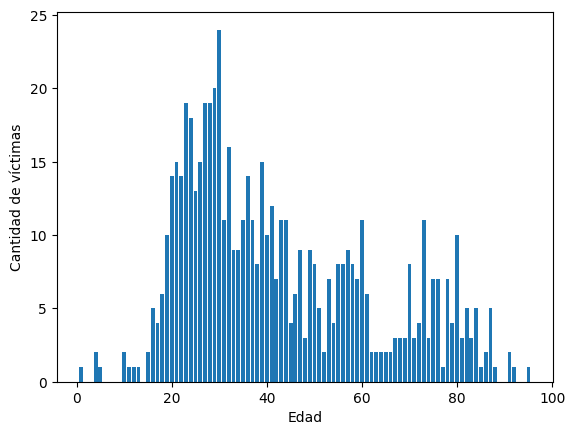

Estadística de prueba: 0.9318814873695374
p-value: 5.195424812750021e-16
Los datos no se ajustan a una distribución normal (se rechaza H0)


In [44]:
edades = homicidios_victimas['EDAD']
histograma = edades.value_counts().sort_index()
plt.bar(histograma.index, histograma.values)
plt.xlabel('Edad')
plt.ylabel('Cantidad de víctimas')
plt.show()

stat, p_value = shapiro(edades)
print(f'Estadística de prueba: {stat}')
print(f'p-value: {p_value}')
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print('Los datos se ajustan a una distribución normal (no se rechaza H0)')
else:
    print('Los datos no se ajustan a una distribución normal (se rechaza H0)')

In [45]:
GG = homicidios_victimas

In [46]:
rangos_etarios = [0, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
GG['RANGO_ETARIO'] = pd.cut(GG['EDAD'], bins=rangos_etarios, right=False)

In [47]:
GG

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_HASTA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0,"[10, 20)"
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0,"[70, 75)"
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0,"[30, 35)"
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11,"[25, 30)"
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24,0,"[30, 35)"
...,...,...,...,...,...,...,...,...,...,...,...,...
603,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0,"[50, 55)"
604,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5,"[10, 20)"
605,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0,"[40, 45)"
606,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3,"[25, 30)"


In [48]:
rangos_etarios = [0, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]
homicidios_victimas['RANGO_ETARIO'] = pd.cut(homicidios_victimas['EDAD'], bins=rangos_etarios, right=False)

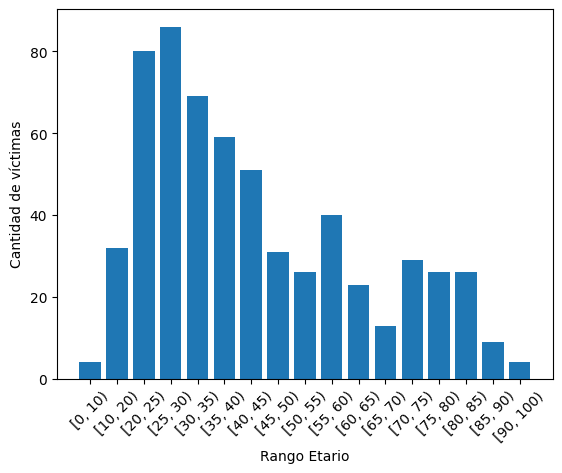

In [49]:
histograma = homicidios_victimas['RANGO_ETARIO'].value_counts().sort_index()
plt.bar(histograma.index.astype(str), histograma.values)
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

**¿En qué rango de edad se encuentran el número mayor de víctimas?**

- Con Diferencia, el rango que más víctimas tiene es el rango de entre 20-40 años

- Los rangos con menores víctimas son los de 0-10 y los de 85-100

In [50]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_HASTA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0,"[10, 20)"
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0,"[70, 75)"
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0,"[30, 35)"
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11,"[25, 30)"
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24,0,"[30, 35)"
...,...,...,...,...,...,...,...,...,...,...,...,...
603,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0,"[50, 55)"
604,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5,"[10, 20)"
605,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0,"[40, 45)"
606,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3,"[25, 30)"


- La idea es utilizar las columnas de fecha para realizar conclusiones respecto a que fechas (años, meses, días, horas) tienen la mayor cantidad de siniestros. Esto es, análisis de series de tiempo y darle sentido a cada periodo similar. Podríamos obtener kpis como por ejemplo a partir de las fechas y del tipo de victima, supongamos que en enero ocurren mayores siniestros y las víctimas son motos, podriamos crear un kpi que nos diga que en este año quiero reducir en un 20% cada mes la cantidad de muertes de victimas que se transportaban en motos ya que si cumplimos con esto, la cantidad de muertes se reduciran en tal porcentaje y va acorde con lo establecido en el kpi principal que es la reduccion de las muertes. De todas formas estos análisis los haré en Tableau ya que me resulta más sencillo.
- Otra cosa es también utilizar la columna ROL, VICTIMA, SEXO, EDAD para determinar patrones de que combinacion es más probable. Lo mismo, imaginemos que la victima estaba conduciendo moto, y que son hombres en su mayoria y estan entre los 20-30, entonces reducir en un 20% la cantidad de muertes de este perfil de victimas en cada mes, obtendriamos que al finalizar el año cumpliriamos con la meta de reducir en 20% de muertes por estos simiestros POR EJEMPLO
- También estaría bueno establecer relaciones entre la cantidad de tiempo que hay entre el siniestro y la muerte de la víctima. Para obtener Kpis, como por ejemplo, reducir en un X% el número de muertes que se suscitaron dentro de los 7 días después del siniestro, por ejemplo, ya que supongamos que en este rango es donde se mueren mas personas y reducir este porcentaje de muertes seria un avance.  

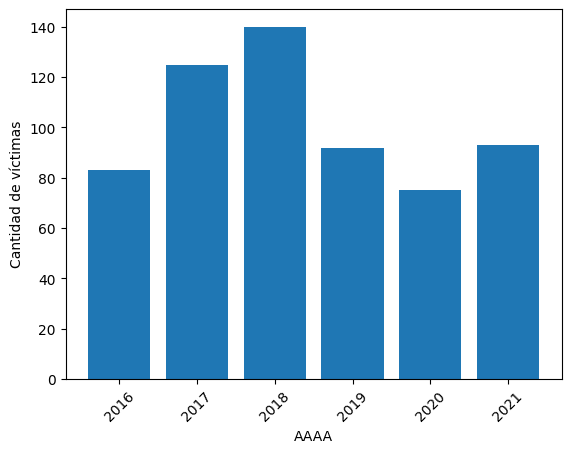

In [51]:
histograma = homicidios_victimas['AAAA'].value_counts().sort_index()
plt.bar(histograma.index.astype(str), histograma.values)
plt.xlabel('AAAA')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

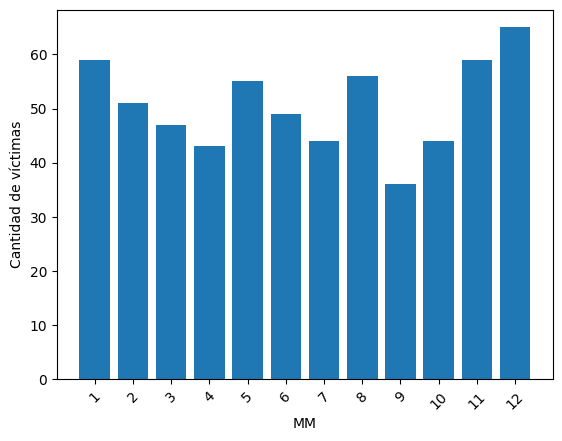

In [52]:
histograma = homicidios_victimas['MM'].value_counts().sort_index()
plt.bar(histograma.index.astype(str), histograma.values)
plt.xlabel('MM')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

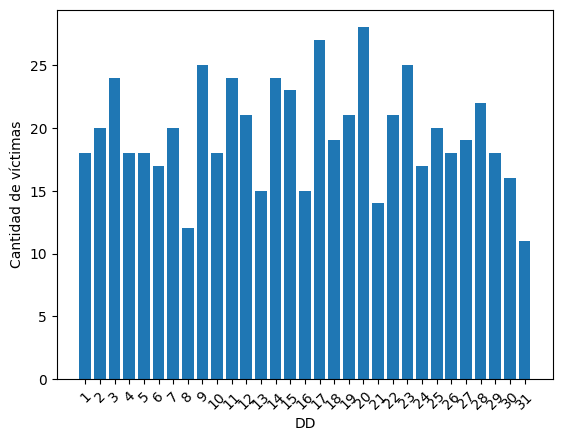

In [53]:
histograma = homicidios_victimas['DD'].value_counts().sort_index()
plt.bar(histograma.index.astype(str), histograma.values)
plt.xlabel('DD')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

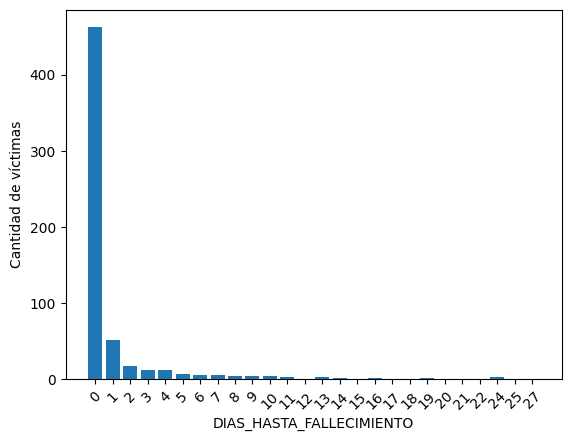

In [54]:
histograma = homicidios_victimas['DIAS_HASTA_FALLECIMIENTO'].value_counts().sort_index()
plt.bar(histograma.index.astype(str), histograma.values)
plt.xlabel('DIAS_HASTA_FALLECIMIENTO')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

- Con diferencia, las personas mueren el mismo día en el que ha ocurrido el siniestro.

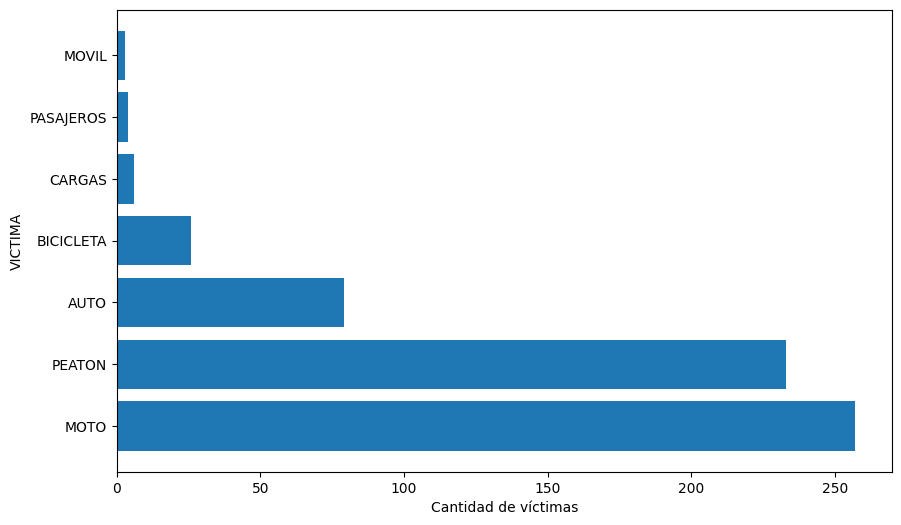

In [55]:
conteo_victimas = homicidios_victimas['VICTIMA'].value_counts()
conteo_victimas = conteo_victimas.sort_values(ascending=False)
plt.figure(figsize=(10, 6)) 
plt.barh(conteo_victimas.index, conteo_victimas.values)
plt.xlabel('Cantidad de víctimas')
plt.ylabel('VICTIMA')
plt.show()

**¿Qué tipo de víctima es la más afectada?**

- Con diferencia, las víctimas que más sufren son las motos y los peatones
- Luego, los que se transportan en vehículos públicos (PASAJEROS), o los que se trasportan en ambulancias, autos policiales.... (MOVIL), ademas de los que se trasportan en vehículos de cargas (CARGAS) son los que menos afectados están   

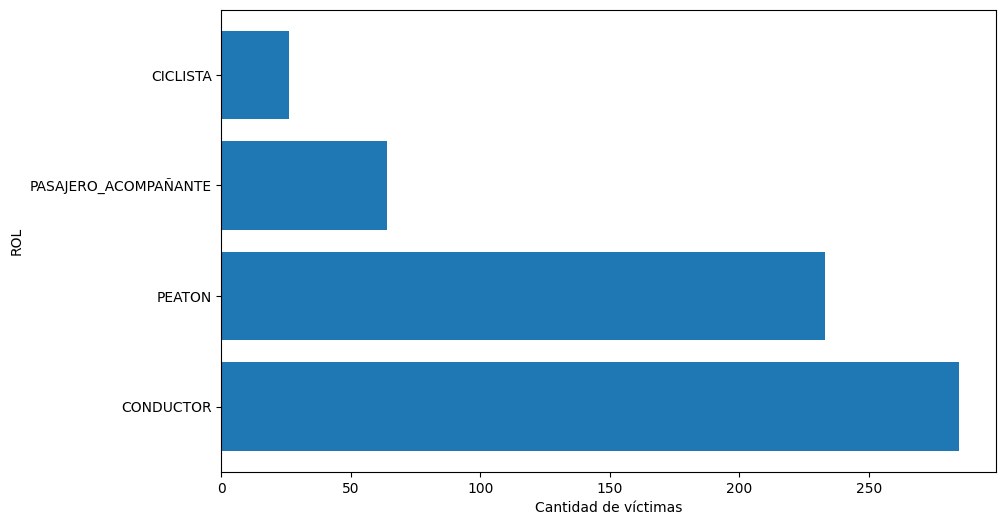

In [56]:
conteo_victimas = homicidios_victimas['ROL'].value_counts()
conteo_victimas = conteo_victimas.sort_values(ascending=False)
plt.figure(figsize=(10, 6)) 
plt.barh(conteo_victimas.index, conteo_victimas.values)
plt.xlabel('Cantidad de víctimas')
plt.ylabel('ROL')
plt.show()

**¿De este tipo de víctimas, que función cumplían los más afectados?**

- Los conductores y los peatones son los que mayor daño han recibido.

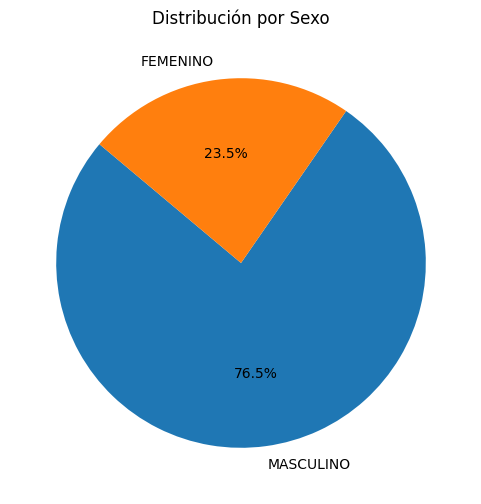

In [57]:
conteo_sexo = homicidios_victimas['SEXO'].value_counts()
plt.figure(figsize=(6, 6))  
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Sexo')
plt.show()


**¿Hombres o Mujeres, cuál de ellos está siendo más afectado?**

- 3/4 partes del total de las víctimas corresponden a que son hombres.

In [58]:
homicidios_victimas.reset_index(drop=True, inplace=True)

In [59]:
homicidios_victimas

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,DIAS_HASTA_FALLECIMIENTO,RANGO_ETARIO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,0,"[10, 20)"
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,0,"[70, 75)"
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,0,"[30, 35)"
3,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2016-02-01,11,"[25, 30)"
4,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24,0,"[30, 35)"
...,...,...,...,...,...,...,...,...,...,...,...,...
603,2021-0092,2021-12-12,2021,12,12,PEATON,PEATON,FEMENINO,50,2021-12-12,0,"[50, 55)"
604,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18,5,"[10, 20)"
605,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20,0,"[40, 45)"
606,2021-0095,2021-12-30,2021,12,30,CONDUCTOR,MOTO,MASCULINO,27,2022-01-02,3,"[25, 30)"


In [61]:
homicidios_victimas.to_excel('Data/Data_procesada/homicidios_victimas.xlsx', index=False)

            Algunas conclusiones:
    

**¿En qué rango de edad se encuentran el número mayor de víctimas?**
- Entre 20-40 años, es el rango que más víctimas tiene. Se trata de una distribución ligeramente sesgada hacia las edades menores.
- Entre 0-10 y 85-100 es poco probable que exista una víctima entre estos rangos.

**¿Y qué pasa con la cantidad de días hasta la muerte de la víctima?**
- Con diferencia, las personas mueren el mismo día en el que ha ocurrido el siniestro.
- Con más presición, diría que a partir de la semana del siniestro, es poco probable que la persona sigue viva.

**¿Qué tipo de víctima es la más afectada?**
- Con diferencia, las víctimas que más sufren son las motos y los peatones.
- Luego, los que se transportan en vehículos públicos (PASAJEROS), o los que se trasportan en ambulancias, autos policiales.... (MOVIL), además de los que se trasportan en vehículos de cargas (CARGAS) son los menos afectados.

**¿De este tipo de víctimas, que función cumplían los más afectados?**
- Los conductores y los peatones son los que mayor daño han recibido.
**¿Hombres o Mujeres, cuál de ellos está siendo más afectado?**
- 3/4 partes del total de las víctimas corresponden a que son hombres.

HOMICIDIOS_HECHOS

In [63]:
homicidios_hechos = pd.read_excel('Data/Data_bruta/homicidios.xlsx', sheet_name=tana[0])

In [64]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [65]:
homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [66]:
homicidios_hechos.dtypes

ID                               object
N_VICTIMAS                        int64
FECHA                    datetime64[ns]
AAAA                              int64
MM                                int64
DD                                int64
HORA                             object
HH                               object
LUGAR_DEL_HECHO                  object
TIPO_DE_CALLE                    object
Calle                            object
Altura                          float64
Cruce                            object
Dirección Normalizada            object
COMUNA                            int64
XY (CABA)                        object
pos x                            object
pos y                            object
PARTICIPANTES                    object
VICTIMA                          object
ACUSADO                          object
dtype: object

            Algunas Transformaciones

In [67]:
homicidios_hechos[homicidios_hechos['ID'].duplicated()]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [68]:
homicidios_hechos[homicidios_hechos['ID']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [69]:
homicidios_hechos[homicidios_hechos['N_VICTIMAS']==0]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [70]:
homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   567
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [71]:
homicidios_hechos[homicidios_hechos['FECHA']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [72]:
homicidios_hechos[homicidios_hechos['AAAA']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [73]:
homicidios_hechos[homicidios_hechos['MM']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [74]:
homicidios_hechos[homicidios_hechos['DD']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [75]:
homicidios_hechos[homicidios_hechos['HORA']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
518,2019-0103,1,2019-12-18,2019,12,18,SD,SD,"PAZ, GRAL. AV. Y GRIVEO",GRAL PAZ,...,NaN,GRIVEO,"PAZ, GRAL. AV. y GRIVEO",11,Point (94643.11254058 103831.57115061),-58.52169422,-34.59471640,MOTO-MOTO,MOTO,MOTO


In [76]:
homicidios_hechos = homicidios_hechos[homicidios_hechos['HORA']!='SD']

In [77]:
homicidios_hechos[homicidios_hechos['HH']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [78]:
homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      1
Altura                   566
Cruce                    171
Dirección Normalizada      8
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [79]:
homicidios_hechos[homicidios_hechos['LUGAR_DEL_HECHO']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
119,2016-0151,1,2016-11-18,2016,11,18,20:35:00,20,SD,CALLE,...,NaN,NaN,NaN,0,Point (. .),.,.,PEATON-SD,PEATON,SD


In [80]:
homicidios_hechos = homicidios_hechos[homicidios_hechos['LUGAR_DEL_HECHO']!='SD']

In [81]:
homicidios_hechos[homicidios_hechos['TIPO_DE_CALLE']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [82]:
homicidios_hechos.isnull().sum()

ID                         0
N_VICTIMAS                 0
FECHA                      0
AAAA                       0
MM                         0
DD                         0
HORA                       0
HH                         0
LUGAR_DEL_HECHO            0
TIPO_DE_CALLE              0
Calle                      0
Altura                   565
Cruce                    170
Dirección Normalizada      7
COMUNA                     0
XY (CABA)                  0
pos x                      0
pos y                      0
PARTICIPANTES              0
VICTIMA                    0
ACUSADO                    0
dtype: int64

In [83]:
homicidios_hechos[homicidios_hechos['Calle']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [84]:
homicidios_hechos[homicidios_hechos['Altura']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [85]:
homicidios_hechos[homicidios_hechos['Altura'].isnull()==True]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
689,2021-0091,1,2021-12-11,2021,12,11,23:00:00,23,BAIGORRIA Y VICTOR HUGO,CALLE,...,NaN,"HUGO, VICTOR","BAIGORRIA y HUGO, VICTOR",10,Point (94810.03686085 100710.80080255),-58.51989389,-34.62284918,MOTO-AUTO,MOTO,AUTO
690,2021-0092,1,2021-12-12,2021,12,12,06:20:00,6,AV. RIVADAVIA Y AV. PUEYRREDON,AVENIDA,...,NaN,PUEYRREDON AV.,RIVADAVIA AV. y PUEYRREDON AV.,3,Point (105258.35368554 102122.93231400),-58.40596860,-34.61011987,PEATON-AUTO,PEATON,AUTO
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO


In [86]:
homicidios_hechos[homicidios_hechos['Cruce']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [87]:
homicidios_hechos[homicidios_hechos['Cruce'].isnull()==True]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
9,2016-0013,1,2016-02-10,2016,2,10,11:30:00,11,AV ENTRE RIOS 1366,AVENIDA,...,1366.0,NaN,ENTRE RIOS AV. 1366,1,Point (106616.41069662 100496.44662323),-58.39114932,-34.62477387,PEATON-AUTO,PEATON,AUTO
14,2016-0020,1,2016-02-17,2016,2,17,16:00:00,16,SUIPACHA 156,CALLE,...,156.0,NaN,SUIPACHA 156,1,Point (107684.31807562 102519.17333314),-58.37952223,-34.60653282,PEATON-AUTO,PEATON,AUTO
33,2016-0047,1,2016-04-15,2016,4,15,05:30:00,5,LIMA 1483,CALLE,...,1483.0,NaN,LIMA 1483,1,Point (107412.19098904 100391.02557777),-58.38247061,-34.62571878,PEATON-PASAJEROS,PEATON,PASAJEROS
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,2021-0082,1,2021-11-06,2021,11,6,04:39:00,4,AU 25 DE MAYO KM7 (ALTURA PASCO),AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO y PASCO,3,Point (106179.07517962 100523.29161457),-58.39591856,-34.62453459,MOTO-AUTO,MOTO,AUTO
685,2021-0087,1,2021-11-27,2021,11,27,11:22:00,11,ESMERALDA 1359,CALLE,...,1359.0,NaN,ESMERALDA 1359,1,Point (107829.16426745 104166.84427133),-58.37795815,-34.59167894,PEATON-BICICLETA,PEATON,BICICLETA
687,2021-0089,1,2021-12-02,2021,12,2,01:10:00,1,AV. GAONA 3655,AVENIDA,...,3655.0,NaN,GAONA AV. 3655,11,Point (98804.41713890 100872.30706871),-58.47633683,-34.62140594,MOTO-AUTO,MOTO,AUTO
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [88]:
homicidios_hechos[homicidios_hechos['Dirección Normalizada']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [89]:
homicidios_hechos[homicidios_hechos['Dirección Normalizada'].isnull()==True]

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
621,2021-0023,1,2021-03-01,2021,3,1,09:20:00,9,"AU BUENOS AIRES LA PLATA KM 4,5",AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS


In [90]:
homicidios_hechos[homicidios_hechos['COMUNA']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [91]:
homicidios_hechos[homicidios_hechos['XY (CABA)']=='Point (. .)']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
71,2016-0096,1,2016-07-25,2016,7,25,07:00:00,7,"AUTOPISTA DELLEPIANE LUIS TTE. GRAL. KM. 2,3",AUTOPISTA,...,NaN,NaN,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,Point (. .),-58.47433193007387,-34.66684950051973,MOTO-CARGAS,MOTO,CARGAS
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO


In [92]:
homicidios_hechos[homicidios_hechos['pos x']=='.']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
38,2016-0052,1,2016-04-20,2016,4,20,20:00:00,20,AUTOPISTA LUGONES PK 10000,AUTOPISTA,...,NaN,NaN,NaN,13,Point (. .),.,.,MOTO-SD,MOTO,SD
106,2016-0136,1,2016-10-25,2016,10,25,00:00:00,0,AU BUENOS AIRES - LA PLATA KM. 4,AUTOPISTA,...,NaN,NaN,NaN,4,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
139,2016-0174,1,2016-12-27,2016,12,27,00:00:00,0,AUTOPISTA 25 DE MAYO,AUTOPISTA,...,NaN,NaN,AUTOPISTA 25 DE MAYO,0,Point (. .),.,.,SD-SD,SD,SD
176,2017-0042,1,2017-04-10,2017,4,10,09:00:00,9,AV. LEOPOLDO LUGONES PKM 6900,GRAL PAZ,...,NaN,NaN,"LUGONES, LEOPOLDO AV.",14,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
180,2017-0050,2,2017-04-28,2017,4,28,11:08:08,11,AU PERITO MORENO Y RAMAL ENLACE AU1/AU6,AUTOPISTA,...,NaN,NaN,NaN,9,Point (. .),.,.,MOTO-CARGAS,MOTO,CARGAS
181,2017-0051,1,2017-05-01,2017,5,1,03:47:47,3,AU DELLEPIANE 2400,AUTOPISTA,...,NaN,NaN,NaN,7,Point (. .),.,.,AUTO-AUTO,AUTO,AUTO
256,2017-0140,1,2017-11-19,2017,11,19,23:22:17,23,AU ARTURO FRONDIZI PKM 3100,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),.,.,MOTO-PASAJEROS,MOTO,PASAJEROS
313,2018-0039,1,2018-04-21,2018,4,21,22:15:00,22,AUTOPISTA LUGONES KM 4.7,AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,PEATON-AUTO,PEATON,AUTO
546,2020-0026,1,2020-05-17,2020,5,17,06:40:00,6,"LUGONES, LEOPOLDO AV. KM 6,1",AUTOPISTA,...,NaN,NaN,NaN,14,Point (. .),.,.,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
559,2020-0039,1,2020-09-01,2020,9,1,19:17:42,19,MURGUIONDO 2700,CALLE,...,NaN,NaN,MURGUIONDO,9,Point (. .),.,.,PEATON-CARGAS,PEATON,CARGAS


In [93]:
homicidios_hechos = homicidios_hechos[homicidios_hechos['pos x']!='.']

In [94]:
homicidios_hechos[homicidios_hechos['pos y']=='.']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO


In [95]:
homicidios_hechos[homicidios_hechos['PARTICIPANTES']=='SD-SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,...,NaN,"CHAVEZ, JORGE","PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,SD-SD,SD,SD
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,...,NaN,TRIUNVIRATO AV.,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,SD-SD,SD,SD
201,2017-0074,1,2017-06-04,2017,6,4,12:50:00,12,CASCO 133,CALLE,...,133.0,NaN,CASCO 133,9,Point (94281.31244858 99043.29027489),-58.52567073,-34.63787791,SD-SD,SD,SD


In [96]:
homicidios_hechos[homicidios_hechos['VICTIMA']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
35,2016-0049,1,2016-04-17,2016,4,17,00:00:00,0,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI KM....,AUTOPISTA,...,NaN,NaN,AUTOPISTA 1 SUR PRESIDENTE ARTURO FRONDIZI,4,Point (. .),-58.37714647568196,-34.63657525428238,SD-SD,SD,SD
76,2016-0101,1,2016-08-07,2016,8,7,19:42:00,19,AV GRAL PAZ Y JORGE CHAVEZ,GRAL PAZ,...,NaN,"CHAVEZ, JORGE","PAZ, GRAL. AV. y CHAVEZ, JORGE",9,Point (93946.81673714 97681.68907836),-58.52932872,-34.65014993,SD-SD,SD,SD
88,2016-0115,1,2016-09-02,2016,9,2,11:50:00,11,ARIAS Y TRONADOR,CALLE,...,NaN,TRONADOR,ARIAS y TRONADOR,12,Point (97608.87024259 108884.67029908),-58.48935041,-34.54917673,SD-CARGAS,SD,CARGAS
92,2016-0119,1,2016-09-04,2016,9,4,06:40:00,6,CRISOLOGO LARRALDE Y AVDA TRIUNVIRATO,AVENIDA,...,NaN,TRIUNVIRATO AV.,"LARRALDE, CRISOLOGO AV. y TRIUNVIRATO AV.",12,Point (96944.69676081 107291.52292157),-58.49659234,-34.56353635,SD-SD,SD,SD
164,2017-0029,1,2017-03-07,2017,3,7,02:15:00,2,MOZART Y TANDIL,CALLE,...,NaN,TANDIL,MOZART y TANDIL,9,Point (98009.35575364 97985.81952007),-58.48501341,-34.64742455,SD-AUTO,SD,AUTO
201,2017-0074,1,2017-06-04,2017,6,4,12:50:00,12,CASCO 133,CALLE,...,133.0,NaN,CASCO 133,9,Point (94281.31244858 99043.29027489),-58.52567073,-34.63787791,SD-SD,SD,SD
214,2017-0089,1,2017-07-13,2017,7,13,12:05:00,12,MARTINIANO LEGUIZAMON 901,CALLE,...,901.0,NaN,"LEGUIZAMON, MARTINIANO 901",9,Point (95246.78684010 97935.32361317),-58.51514709,-34.64787051,SD-AUTO,SD,AUTO
269,2017-0155,1,2017-12-12,2017,12,12,21:25:41,21,AV. RIVADAVIA 6350,AVENIDA,...,6350.0,NaN,RIVADAVIA AV. 6350,7,Point (100674.98109200 100299.64949548),-58.45593915,-34.62656868,SD-MOTO,SD,MOTO


In [97]:
homicidios_hechos=homicidios_hechos[homicidios_hechos['VICTIMA']!='SD']

In [98]:
homicidios_hechos[homicidios_hechos['ACUSADO']=='SD']

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
32,2016-0045,1,2016-04-11,2016,4,11,10:25:00,10,AV GRAL PAZ Y AV DEL LIBERTADOR,GRAL PAZ,...,NaN,DEL LIBERTADOR AV.,"PAZ, GRAL. AV. y DEL LIBERTADOR AV.",13,Point (99620.34936816 110483.29286598),-58.46743471,-34.53476874,MOTO-SD,MOTO,SD
57,2016-0080,1,2016-06-18,2016,6,18,06:42:00,6,AV GRAL PAZ Y AV RIVADAVIA,GRAL PAZ,...,NaN,RIVADAVIA AV.,"PAZ, GRAL. AV. y RIVADAVIA AV.",9,Point (93950.50587297 98883.37644525),-58.52927982,-34.63931752,AUTO-SD,AUTO,SD
83,2016-0110,1,2016-08-24,2016,8,24,20:21:00,20,AV ALBERDI Y CARHUE,AVENIDA,...,NaN,CARHUE,"ALBERDI, JUAN BAUTISTA AV. y CARHUE",9,Point (95506.35959227 96696.89655626),-58.51232237,-34.65903530,PEATON-SD,PEATON,SD
105,2016-0135,1,2016-10-24,2016,10,24,05:00:00,5,AV FIGUEROA ALCORTA Y PINEDO,AVENIDA,...,NaN,"PINEDO, INT.","FIGUEROA ALCORTA, PRES. AV. y PINEDO, INT.",14,Point (103734.76257993 107235.78328415),-58.42260225,-34.56403694,PEATON-SD,PEATON,SD
112,2016-0143,1,2016-11-06,2016,11,6,04:41:00,4,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-SD,MOTO,SD
126,2016-0159,1,2016-12-04,2016,12,4,07:21:00,7,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,AUTO-SD,AUTO,SD
160,2017-0025,1,2017-02-24,2017,2,24,17:05:00,17,AV. FERNANDEZ DE LA CRUZ Y RIVERA INDARTE,AVENIDA,...,NaN,RIVERA INDARTE AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV. y RIVERA I...",7,Point (102489.38230491 97228.94942016),-58.43614426,-34.65424640,MOTO-SD,MOTO,SD
197,2017-0069,1,2017-05-24,2017,5,24,14:15:00,14,AV. GRAL. PAZ Y ULRICO SCHMIDL,GRAL PAZ,...,NaN,"SCHMIDL, ULRICO","PAZ, GRAL. AV. y SCHMIDL, ULRICO",9,Point (94644.00300729 96592.22735507),-58.52173071,-34.65997463,MOTO-SD,MOTO,SD
216,2017-0091,1,2017-07-15,2017,7,15,13:00:00,13,SUPERI Y AV. GRAL. PAZ,GRAL PAZ,...,NaN,"PAZ, GRAL. AV.","SUPERI y PAZ, GRAL. AV.",12,Point (97850.57417090 109546.39428377),-58.48671535,-34.54321216,MOTO-SD,MOTO,SD


In [99]:
homicidios_hechos=homicidios_hechos[homicidios_hechos['ACUSADO']!='SD']

In [100]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
5,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AV 27 DE FEBRERO Y AV ESCALADA,AVENIDA,...,NaN,ESCALADA AV.,27 DE FEBRERO AV. y ESCALADA AV.,8,Point (101721.59002217 93844.25656649),-58.44451316,-34.68475866,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [101]:
homicidios_hechos["pos x"] = homicidios_hechos["pos x"].astype(float)

In [102]:
homicidios_hechos["pos y"] = homicidios_hechos["pos y"].astype(float)

Se han eliminado pocas filas en comparación al total. Opté por eliminar y no imputar debido a la simplicidad que ofrecía el eliminar filas y su bajo coste en cuánto a calidad de datos; al contrario de la imputación ya que estuve probando imputación por ML, sin embargo, no ofrecía mayores resultados, esto se irá repitiendo para 'lesiones_víctimas' y para 'lesiones_hechos', lo mismo, se ha optado por la eliminación de filas por la simplicidad del uso y por el bajo coste asociado a esta eliminación.

In [103]:
homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [104]:
columnas_a_eliminar=['LUGAR_DEL_HECHO','Calle','Altura','Cruce','Dirección Normalizada','XY (CABA)']

Considero que estas columnas no las usaré en mi presentación, por tanto, opto por eliminarlas

In [105]:
homicidios_hechos = homicidios_hechos.drop(columnas_a_eliminar, axis=1)

In [106]:
homicidios_hechos.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'TIPO_DE_CALLE', 'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES', 'VICTIMA',
       'ACUSADO'],
      dtype='object')

In [107]:
homicidios_hechos.reset_index(drop=True, inplace=True)

In [108]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AVENIDA,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
655,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
656,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
657,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [109]:
homicidios_hechos = homicidios_hechos.rename(columns={'pos y': 'Latitud'})

In [110]:
homicidios_hechos = homicidios_hechos.rename(columns={'pos x': 'Longitud'})

In [111]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AVENIDA,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
655,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
656,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
657,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


                Ahora sí, algunos análisis 

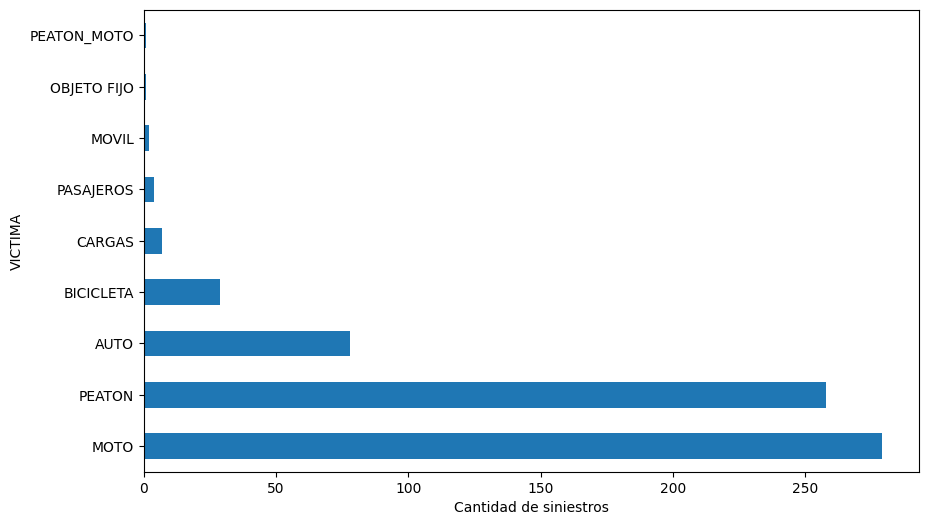

In [112]:
conteo_comuna = homicidios_hechos['VICTIMA'].value_counts()
plt.figure(figsize=(10, 6))
conteo_comuna.plot(kind='barh')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('VICTIMA')
plt.show()

- Las motos y los peatones y por ahí los autos, son los que en la mayoría de siniestros son las víctimas.  

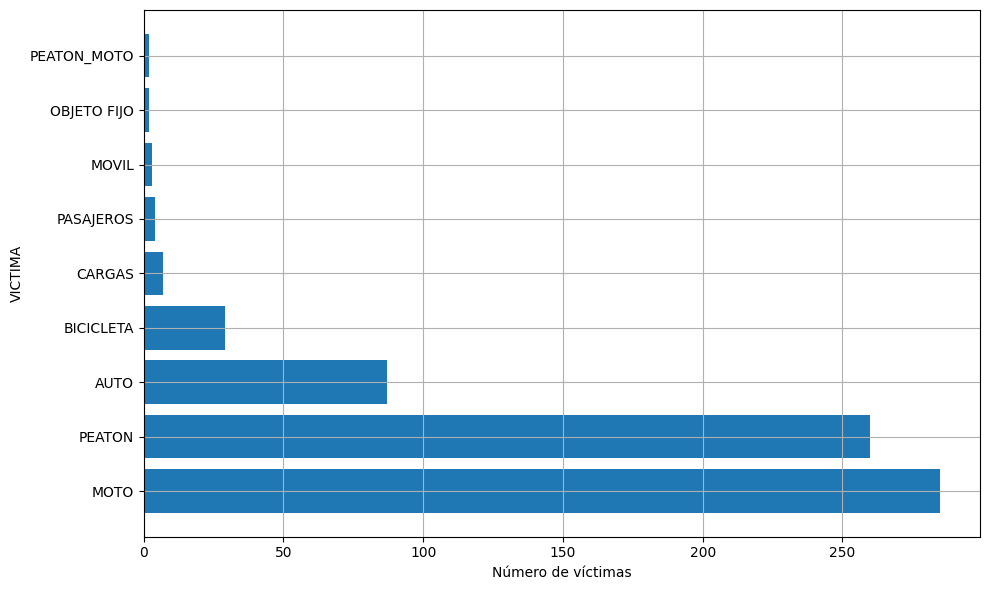

In [113]:
victimas_unicas = homicidios_hechos['VICTIMA'].unique()
suma_acumulada_df = pd.DataFrame(columns=['VICTIMA', 'SUMA_ACUMULADA'])
for victima in victimas_unicas:
    subset = homicidios_hechos[homicidios_hechos['VICTIMA'] == victima]
    suma_acumulada = subset['N_VICTIMAS'].sum()
    suma_acumulada_df = pd.concat([suma_acumulada_df, pd.DataFrame({'VICTIMA': [victima], 'SUMA_ACUMULADA': [suma_acumulada]})], ignore_index=True)
suma_acumulada_df = suma_acumulada_df.sort_values(by='SUMA_ACUMULADA', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(suma_acumulada_df['VICTIMA'], suma_acumulada_df['SUMA_ACUMULADA'])
plt.xlabel('Número de víctimas')
plt.ylabel('VICTIMA')
plt.tight_layout()
plt.grid(True)
plt.show()

- Coincide la cantidad de siniestros que tienen como víctimas a las motos, peatones y autos, con la cantidad de víctimas que hay de cada tipo. 

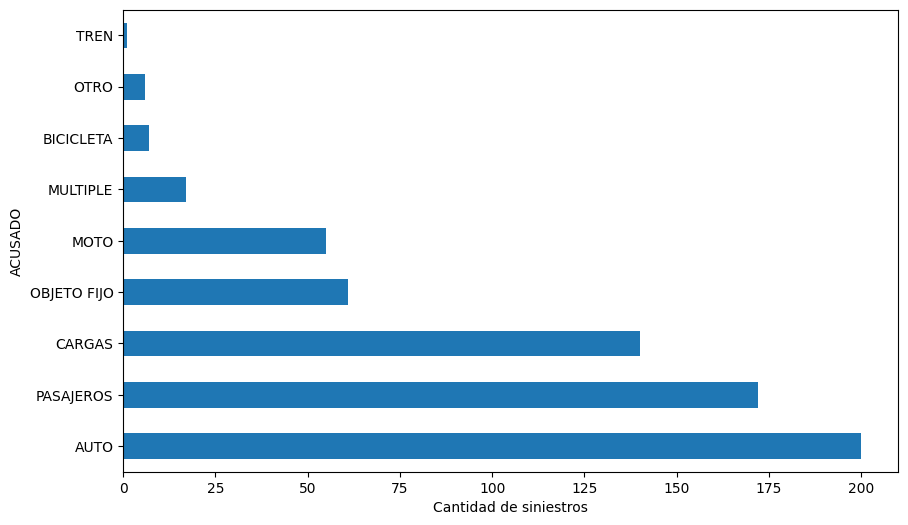

In [114]:
conteo_comuna = homicidios_hechos['ACUSADO'].value_counts()
plt.figure(figsize=(10, 6))
conteo_comuna.plot(kind='barh')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('ACUSADO')
plt.show()

- Los acusados que en mayores siniestros están envueltos son los autos, pasajeros, cargas.

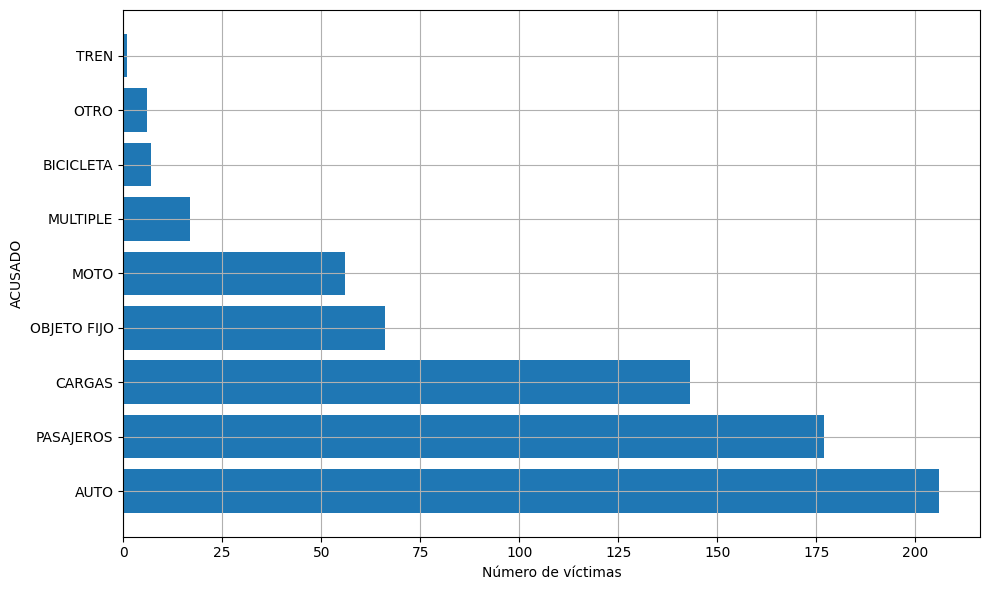

In [115]:
victimas_unicas = homicidios_hechos['ACUSADO'].unique()
suma_acumulada_df = pd.DataFrame(columns=['ACUSADO', 'SUMA_ACUMULADA'])
for victima in victimas_unicas:
    subset = homicidios_hechos[homicidios_hechos['ACUSADO'] == victima]
    suma_acumulada = subset['N_VICTIMAS'].sum()
    suma_acumulada_df = pd.concat([suma_acumulada_df, pd.DataFrame({'ACUSADO': [victima], 'SUMA_ACUMULADA': [suma_acumulada]})], ignore_index=True)
suma_acumulada_df = suma_acumulada_df.sort_values(by='SUMA_ACUMULADA', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(suma_acumulada_df['ACUSADO'], suma_acumulada_df['SUMA_ACUMULADA'])
plt.xlabel('Número de víctimas')
plt.ylabel('ACUSADO')
plt.tight_layout()
plt.grid(True)
plt.show()

- Coincide lo mismo con el número de víctimas asociadas.

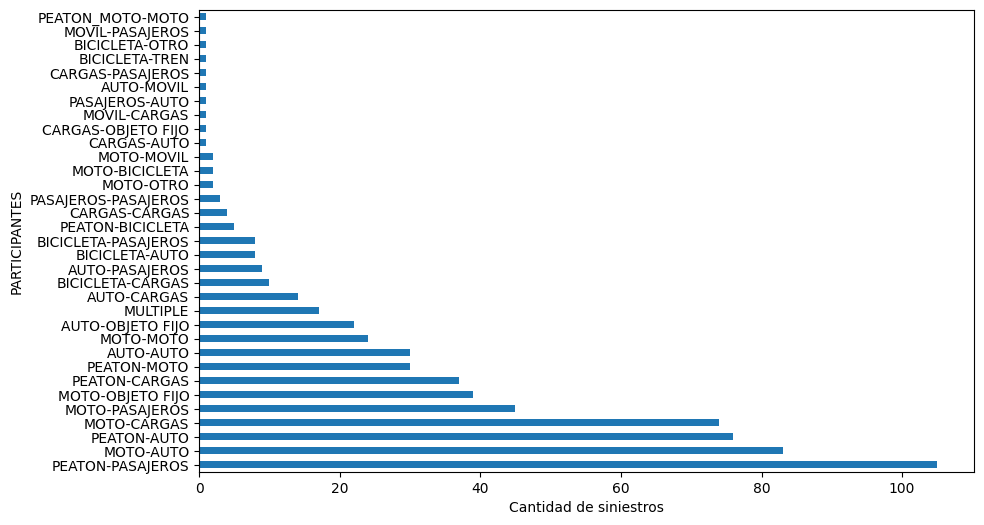

In [116]:
conteo_comuna = homicidios_hechos['PARTICIPANTES'].value_counts()
plt.figure(figsize=(10, 6))
conteo_comuna.plot(kind='barh')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('PARTICIPANTES')
plt.show()

- Aquí vemos como los peatones coinciden más con los vehículos de transporte público.
- Luego los que manejan moto coinciden más con los autos. 
- Finalmente también hay coincidencias entre peatones y autos. 
Menciono estos ya que presentan mayores diferencias respecto al resto de combinaciones.
Peatones, Autos y Transporte público son los actores que están envueltos en la mayoría de los siniestros

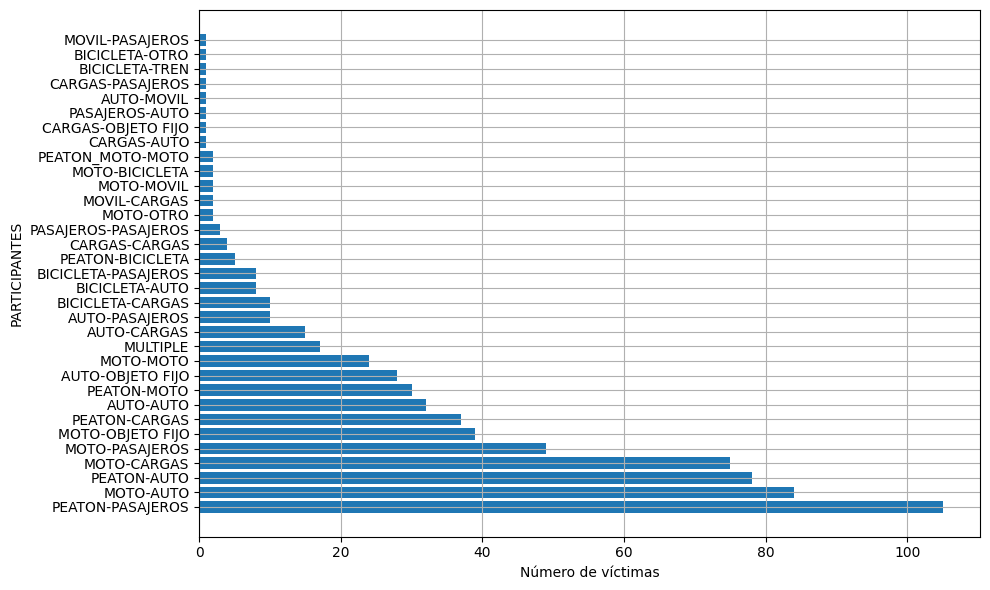

In [118]:
victimas_unicas = homicidios_hechos['PARTICIPANTES'].unique()
suma_acumulada_df = pd.DataFrame(columns=['PARTICIPANTES', 'SUMA_ACUMULADA'])
for victima in victimas_unicas:
    subset = homicidios_hechos[homicidios_hechos['PARTICIPANTES'] == victima]
    suma_acumulada = subset['N_VICTIMAS'].sum()
    suma_acumulada_df = pd.concat([suma_acumulada_df, pd.DataFrame({'PARTICIPANTES': [victima], 'SUMA_ACUMULADA': [suma_acumulada]})], ignore_index=True)
suma_acumulada_df = suma_acumulada_df.sort_values(by='SUMA_ACUMULADA', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(suma_acumulada_df['PARTICIPANTES'], suma_acumulada_df['SUMA_ACUMULADA'])
plt.xlabel('Número de víctimas')
plt.ylabel('PARTICIPANTES')
plt.tight_layout()
plt.grid(True)
plt.show()

- Coincide con el número de víctimas

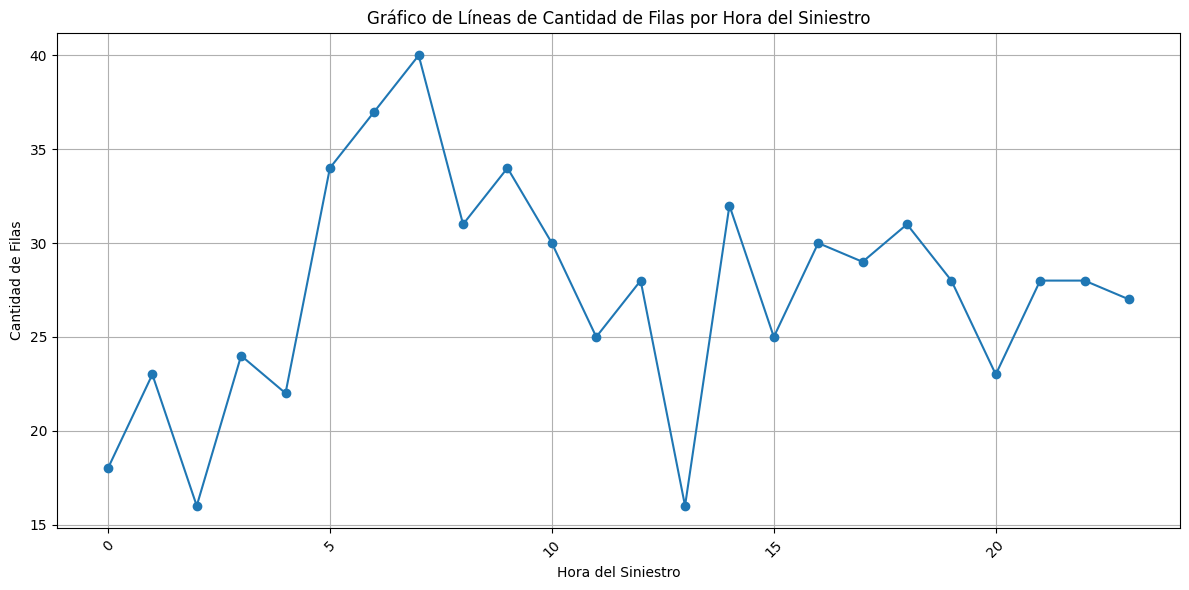

In [119]:
count_by_hour = homicidios_hechos['HH'].value_counts().reset_index()
count_by_hour.columns = ['Hora', 'Cantidad']
count_by_hour = count_by_hour.sort_values(by='Hora')
plt.figure(figsize=(12, 6))  
plt.plot(count_by_hour['Hora'], count_by_hour['Cantidad'], marker='o', linestyle='-')  
plt.xlabel('Hora del Siniestro')
plt.ylabel('Cantidad de Filas')
plt.title('Gráfico de Líneas de Cantidad de Filas por Hora del Siniestro')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.grid(True) 
plt.show()

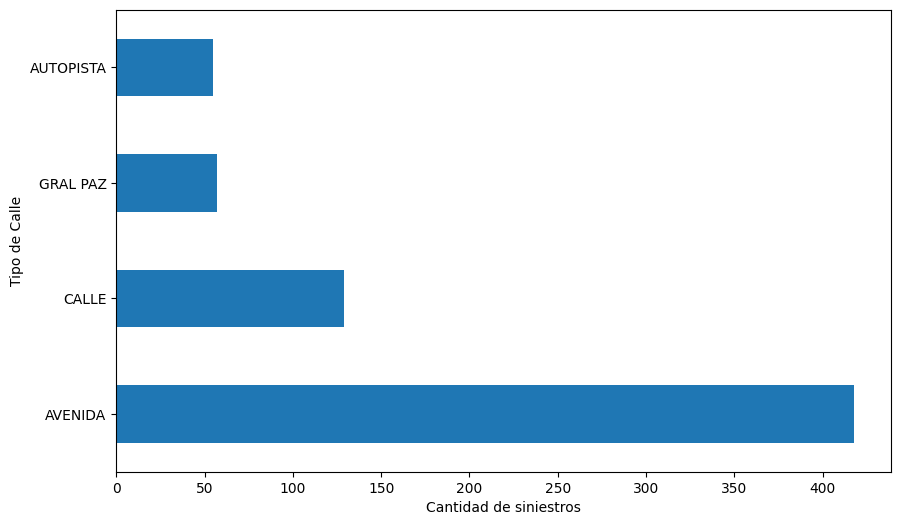

In [120]:
conteo_comuna = homicidios_hechos['TIPO_DE_CALLE'].value_counts()
plt.figure(figsize=(10, 6))
conteo_comuna.plot(kind='barh')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('Tipo de Calle')
plt.show()

Las avenidas son las que más siniestros tienen

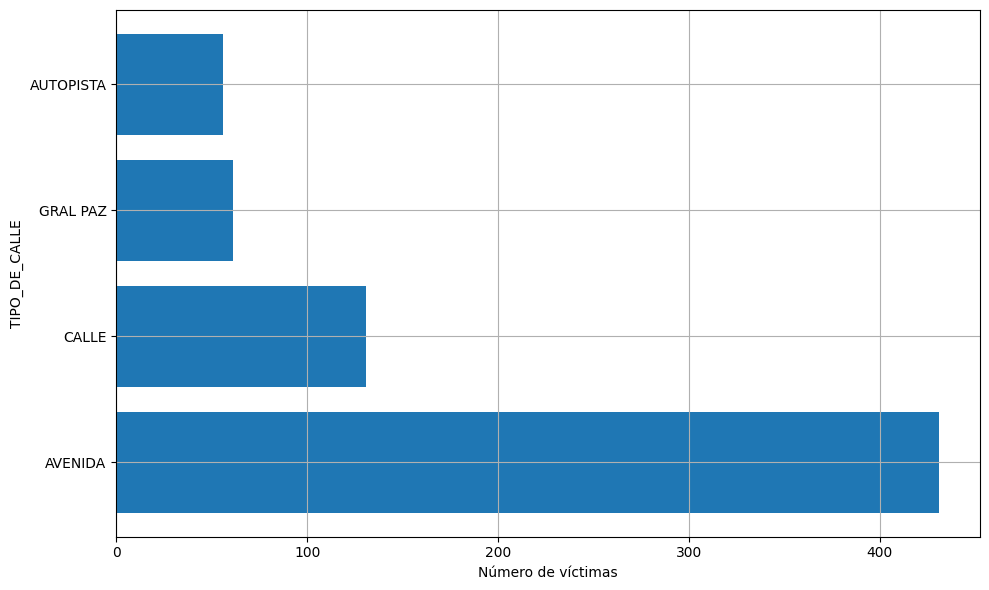

In [121]:
victimas_unicas = homicidios_hechos['TIPO_DE_CALLE'].unique()
suma_acumulada_df = pd.DataFrame(columns=['TIPO_DE_CALLE', 'SUMA_ACUMULADA'])
for victima in victimas_unicas:
    subset = homicidios_hechos[homicidios_hechos['TIPO_DE_CALLE'] == victima]
    suma_acumulada = subset['N_VICTIMAS'].sum()
    suma_acumulada_df = pd.concat([suma_acumulada_df, pd.DataFrame({'TIPO_DE_CALLE': [victima], 'SUMA_ACUMULADA': [suma_acumulada]})], ignore_index=True)
suma_acumulada_df = suma_acumulada_df.sort_values(by='SUMA_ACUMULADA', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(suma_acumulada_df['TIPO_DE_CALLE'], suma_acumulada_df['SUMA_ACUMULADA'])
plt.xlabel('Número de víctimas')
plt.ylabel('TIPO_DE_CALLE')
plt.tight_layout()
plt.grid(True)
plt.show()

Coincide

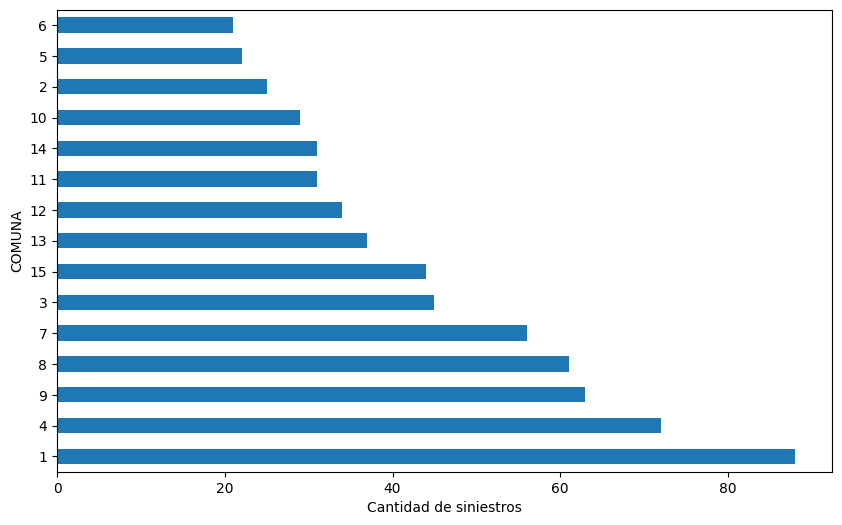

In [122]:
conteo_comuna = homicidios_hechos['COMUNA'].value_counts()
plt.figure(figsize=(10, 6))
conteo_comuna.plot(kind='barh')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('COMUNA')
plt.show()

Bueno, ya podemos ver que ciertas comunas son las más afectadas, diría que habría que prestar atención principalmente a partir de la comuna 13, 15, 3,..., 1. ESTAS COMUNAS SON LAS QUE MAYORES SINIESTROS PRESENTAN.

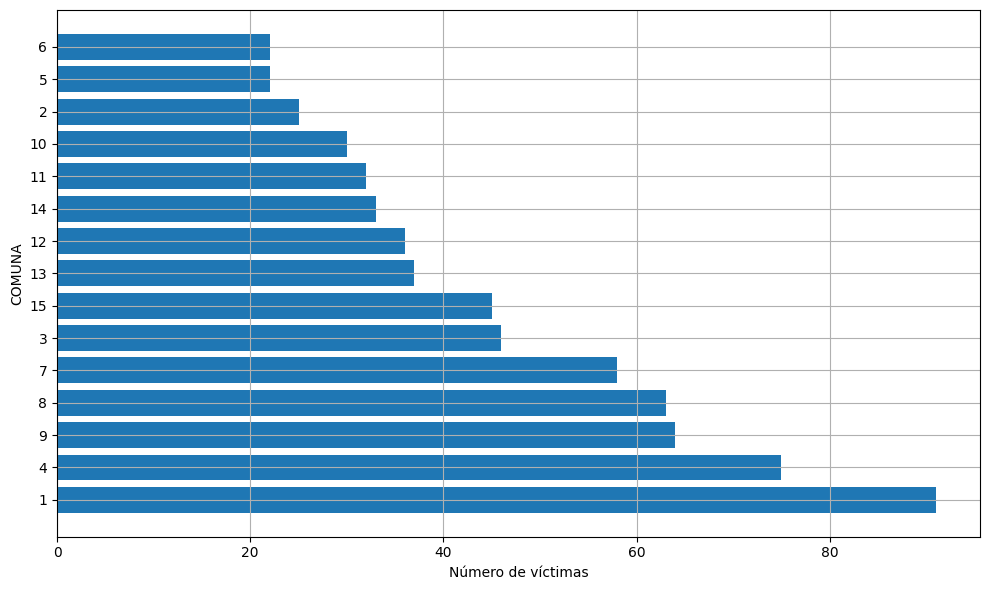

In [123]:
df_copia = homicidios_hechos.copy()
df_copia['COMUNA'] = df_copia['COMUNA'].astype(str)
suma_acumulada_df = df_copia.groupby('COMUNA')['N_VICTIMAS'].sum().reset_index()
suma_acumulada_df = suma_acumulada_df.sort_values(by='N_VICTIMAS', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(suma_acumulada_df['COMUNA'], suma_acumulada_df['N_VICTIMAS'])
plt.xlabel('Número de víctimas')
plt.ylabel('COMUNA')
plt.tight_layout()
plt.grid(True)
plt.show()

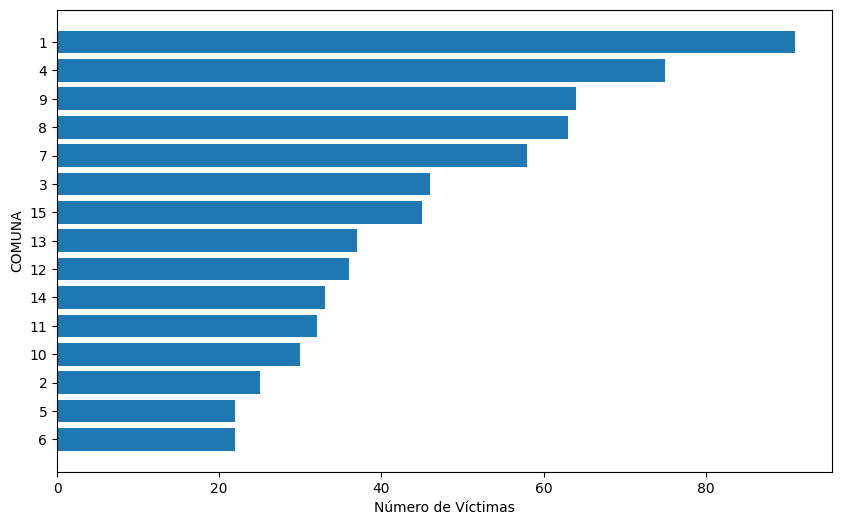

In [124]:
homicidios_hechos_copia = homicidios_hechos.copy()
homicidios_hechos_copia['N_VICTIMAS'] = pd.to_numeric(homicidios_hechos_copia['N_VICTIMAS'], errors='coerce')
homicidios_hechos_copia = homicidios_hechos_copia.dropna(subset=['N_VICTIMAS'])
homicidios_hechos_copia['COMUNA'] = homicidios_hechos_copia['COMUNA'].astype(str)
comuna_victimas = homicidios_hechos_copia.groupby('COMUNA')['N_VICTIMAS'].sum()
comuna_victimas_sorted = comuna_victimas.sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
plt.barh(comuna_victimas_sorted.index[::-1], comuna_victimas_sorted.values[::-1])
plt.xlabel('Número de Víctimas')
plt.ylabel('COMUNA')
plt.show()

COINCIDE el número de víctimas con el número de siniestros por comuna más o menos.

In [125]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AVENIDA,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
655,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
656,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
657,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS


In [126]:
homicidios_hechos.to_excel('Data/Data_procesada/homicidios_hechos.xlsx', index=False)

            Algunas conclusiones

**Sobre el perfil de las víctimas**
- Las motos, los peatones y por ahí los autos, son los que en la mayoría de siniestros son las víctimas.
- Coincide también según el número de víctimas.  

**Sobre el perfil de los acusados**
- Los acusados que en mayores siniestros están envueltos son los autos, vehículo de transporte público y los vehículos de cargas.
- Coincide lo mismo con el número de víctimas asociadas.

**Sobre las combinaciones que más coinciden**
- Aquí vemos como los peatones coinciden más con los vehículos de transporte público.
- Luego los que manejan moto coinciden más con los autos. 
- Finalmente también hay coincidencias entre peatones y autos. 
Menciono estos ya que presentan mayores diferencias respecto al resto de combinaciones.
Peatones, Autos y Transporte público son los actores que están envueltos en la mayoría de los siniestros.
- Coincide con el número de víctimas.

**¿Qué tipo de calle es la que más siniestros tiene y la que tiene el mayor número de víctimas?**
- Las avenidas son las que más siniestros tienen.
- Coincide según el número de víctimas.

**¿Y qué pasa por comuna?**
- Bueno, ya podemos ver que ciertas comunas son las más afectadas, diría que habría que prestar atención principalmente a partir de la comuna 13, 15, 3,..., 1. ESTAS COMUNAS SON LAS QUE MAYORES SINIESTROS PRESENTAN.
- Coincide según el número de víctimas.

# **LESIONES**
---


In [127]:
with pd.ExcelFile('Data/Data_bruta/lesiones.xlsx') as xls:
    tuqui = xls.sheet_names

In [128]:
tuqui

['HECHOS', 'DICCIONARIO_HECHOS', 'VICTIMAS', 'DICCIONARIO_VICTIMAS']



> LESIONES_VICTIMAS



In [129]:
lesiones_victimas = pd.read_excel('Data/Data_bruta/lesiones.xlsx', sheet_name=tuqui[2])

In [130]:
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [131]:
lesiones_victimas.isnull().sum()

ID hecho            0
AAA                 0
MM                  0
DD                  0
FECHA               0
VEHICULO_VICTIMA    0
SEXO                0
EDAD_VICTIMA        0
GRAVEDAD            0
dtype: int64

            Transformaciones

In [132]:
lesiones_victimas['ID hecho'].unique()

array(['LC-2019-0000053', 'LC-2019-0000063', 'LC-2019-0000079', ...,
       'LC-2021-0530228', 'LC-2021-0201378', 'LC-2021-0229350'],
      dtype=object)

In [133]:
lesiones_victimas[lesiones_victimas['ID hecho']=='SD']

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD


In [134]:
lesiones_victimas[lesiones_victimas['AAA']=='SD']

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD


In [135]:
lesiones_victimas[lesiones_victimas['MM']=='SD']

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD


In [136]:
lesiones_victimas[lesiones_victimas['DD']=='SD']

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD


In [137]:
filtro = (lesiones_victimas['VEHICULO_VICTIMA'].str.lower() == 'sd')
lesiones_victimas[filtro]

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27587,LC-2021-0591005,2021,11,25,2021-11-25,SD,Varon,26,GRAVE
27588,LC-2021-0530069,2021,10,25,2021-10-25,SD,Varon,49,SD
27589,LC-2021-0078012,2021,2,21,2021-02-21,SD,SD,SD,SD
27590,LC-2021-0078012,2021,2,21,2021-02-21,SD,Mujer,34,SD


In [138]:
filtro = (lesiones_victimas['SEXO'].str.lower() == 'sd')
lesiones_victimas[filtro]

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
10,LC-2019-0000179,2019,1,1,2019-01-01,sd,SD,SD,SD
31,LC-2019-0001879,2019,1,2,2019-01-02,sd,SD,SD,SD
41,LC-2019-0003340,2019,1,2,2019-01-02,sd,SD,SD,SD
193,LC-2019-0014534,2019,1,8,2019-01-08,sd,SD,18,SD
...,...,...,...,...,...,...,...,...,...
27578,LC-2021-0000449,2021,1,1,2021-01-01,SD,SD,SD,SD
27589,LC-2021-0078012,2021,2,21,2021-02-21,SD,SD,SD,SD
27595,LC-2021-0230174,2021,5,26,2021-05-26,SD,SD,SD,SD
27596,LC-2021-0305042,2021,6,28,2021-06-28,AUTO,SD,SD,SD


In [139]:
filtro = (lesiones_victimas['EDAD_VICTIMA'].str.lower() == 'sd')
lesiones_victimas[filtro]

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
10,LC-2019-0000179,2019,1,1,2019-01-01,sd,SD,SD,SD
14,LC-2019-0000347,2019,1,1,2019-01-01,sd,Varon,SD,SD
21,LC-2019-0000647,2019,1,1,2019-01-01,sd,Varon,SD,SD
...,...,...,...,...,...,...,...,...,...
27578,LC-2021-0000449,2021,1,1,2021-01-01,SD,SD,SD,SD
27589,LC-2021-0078012,2021,2,21,2021-02-21,SD,SD,SD,SD
27595,LC-2021-0230174,2021,5,26,2021-05-26,SD,SD,SD,SD
27596,LC-2021-0305042,2021,6,28,2021-06-28,AUTO,SD,SD,SD


In [140]:
filtro = (lesiones_victimas['GRAVEDAD'].str.lower() == 'sd')
lesiones_victimas[filtro]

,ID hecho,AAA,MM,DD,FECHA,VEHICULO_VICTIMA,SEXO,EDAD_VICTIMA,GRAVEDAD
0,LC-2019-0000053,2019,1,1,2019-01-01,sd,Varon,57,SD
1,LC-2019-0000063,2019,1,1,2019-01-01,sd,SD,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,sd,Varon,SD,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,sd,Varon,45,SD
4,LC-2019-0000082,2019,1,1,2019-01-01,sd,Mujer,45,SD
...,...,...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,TRANSPORTE PUBLICO,Varon,87,SD
27601,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,60,SD
27602,LC-2021-0530228,2021,10,25,2021-10-25,TRANSPORTE PUBLICO,Mujer,32,SD
27603,LC-2021-0201378,2021,5,2,2021-05-02,MOTO,Varon,32,SD


In [141]:
# Elimino la columna VEHICULO_VICTIMA porque hay muchos valores faltantes
lesiones_victimas = lesiones_victimas.drop('VEHICULO_VICTIMA', axis=1)

In [142]:
# También la columna GRAVEDAD
lesiones_victimas = lesiones_victimas.drop('GRAVEDAD', axis=1)

In [143]:
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,SEXO,EDAD_VICTIMA
0,LC-2019-0000053,2019,1,1,2019-01-01,Varon,57
1,LC-2019-0000063,2019,1,1,2019-01-01,SD,SD
2,LC-2019-0000079,2019,1,1,2019-01-01,Varon,SD
3,LC-2019-0000082,2019,1,1,2019-01-01,Varon,45
4,LC-2019-0000082,2019,1,1,2019-01-01,Mujer,45
...,...,...,...,...,...,...,...
27600,LC-2021-0451911,2021,9,11,2021-09-11,Varon,87
27601,LC-2021-0530228,2021,10,25,2021-10-25,Mujer,60
27602,LC-2021-0530228,2021,10,25,2021-10-25,Mujer,32
27603,LC-2021-0201378,2021,5,2,2021-05-02,Varon,32


In [144]:
lesiones_victimas = lesiones_victimas[lesiones_victimas['SEXO'].str.lower() != 'sd']

In [145]:
lesiones_victimas = lesiones_victimas[lesiones_victimas['EDAD_VICTIMA'].str.lower() != 'sd']

In [146]:
lesiones_victimas.reset_index(drop=True, inplace=True)

In [147]:
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,SEXO,EDAD_VICTIMA
0,LC-2019-0000053,2019,1,1,2019-01-01,Varon,57
1,LC-2019-0000082,2019,1,1,2019-01-01,Varon,45
2,LC-2019-0000082,2019,1,1,2019-01-01,Mujer,45
3,LC-2019-0000082,2019,1,1,2019-01-01,Varon,27
4,LC-2019-0000082,2019,1,1,2019-01-01,Mujer,32
...,...,...,...,...,...,...,...
23037,LC-2021-0451911,2021,9,11,2021-09-11,Varon,87
23038,LC-2021-0530228,2021,10,25,2021-10-25,Mujer,60
23039,LC-2021-0530228,2021,10,25,2021-10-25,Mujer,32
23040,LC-2021-0201378,2021,5,2,2021-05-02,Varon,32


In [148]:
lesiones_victimas['EDAD_VICTIMA'] = lesiones_victimas['EDAD_VICTIMA'].astype(int)

In [149]:
lesiones_victimas['SEXO'] = lesiones_victimas['SEXO'].str.strip().str.upper()

In [150]:
lesiones_victimas['SEXO'].unique()

array(['VARON', 'MUJER'], dtype=object)

            Análisis

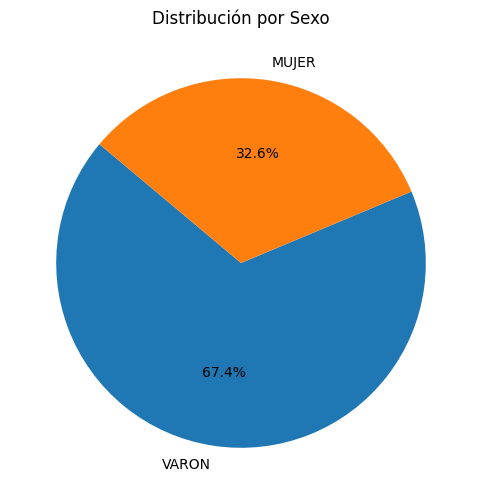

In [151]:
conteo_sexo = lesiones_victimas['SEXO'].value_counts()

plt.figure(figsize=(6, 6)) 
plt.pie(conteo_sexo, labels=conteo_sexo.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por Sexo')
plt.show()

- 2/3 partes de las víctimas corresponden a varones. (Algo parecido con lo que ocurría en los homicidios).

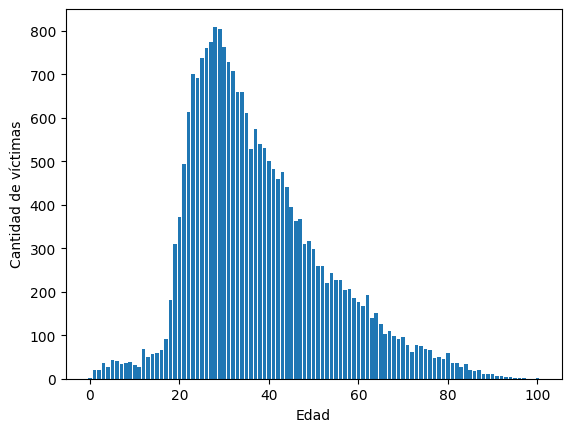

Estadística de prueba: 0.9532729983329773
p-value: 0.0
Los datos no se ajustan a una distribución normal (se rechaza H0)


C:\Users\sramr\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [152]:
edades = lesiones_victimas['EDAD_VICTIMA']
histograma = edades.value_counts().sort_index()
plt.bar(histograma.index, histograma.values)
plt.xlabel('Edad')
plt.ylabel('Cantidad de víctimas')
plt.show()

stat, p_value = shapiro(edades)
print(f'Estadística de prueba: {stat}')
print(f'p-value: {p_value}')
alpha = 0.05  # Nivel de significancia
if p_value > alpha:
    print('Los datos se ajustan a una distribución normal (no se rechaza H0)')
else:
    print('Los datos no se ajustan a una distribución normal (se rechaza H0)')

- Lo mismo que con los homicidios, la distribución se encuentra ligeramente sesgada hacia la izquierda, entre 20-40 años se encuentra la mayoría de las víctimas.

In [153]:
rangos_etarios = [0, 10, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100]

In [154]:
# DETERMINAMOS LOS RANGOS ETARIOS A PARTIR DE ESTE HISTOGRAMA
lesiones_victimas['RANGO_ETARIO'] = pd.cut(lesiones_victimas['EDAD_VICTIMA'], bins=rangos_etarios, right=False)

In [155]:
lesiones_victimas

,ID hecho,AAA,MM,DD,FECHA,SEXO,EDAD_VICTIMA,RANGO_ETARIO
0,LC-2019-0000053,2019,1,1,2019-01-01,VARON,57,"[55, 60)"
1,LC-2019-0000082,2019,1,1,2019-01-01,VARON,45,"[45, 50)"
2,LC-2019-0000082,2019,1,1,2019-01-01,MUJER,45,"[45, 50)"
3,LC-2019-0000082,2019,1,1,2019-01-01,VARON,27,"[25, 30)"
4,LC-2019-0000082,2019,1,1,2019-01-01,MUJER,32,"[30, 35)"
...,...,...,...,...,...,...,...,...
23037,LC-2021-0451911,2021,9,11,2021-09-11,VARON,87,"[85, 90)"
23038,LC-2021-0530228,2021,10,25,2021-10-25,MUJER,60,"[60, 65)"
23039,LC-2021-0530228,2021,10,25,2021-10-25,MUJER,32,"[30, 35)"
23040,LC-2021-0201378,2021,5,2,2021-05-02,VARON,32,"[30, 35)"


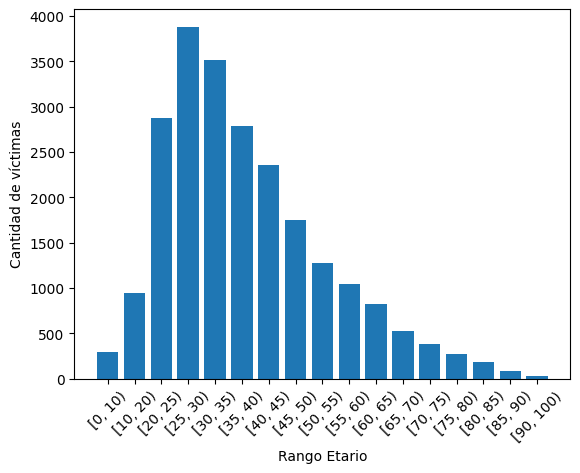

In [156]:
histograma = lesiones_victimas['RANGO_ETARIO'].value_counts().sort_index()
plt.bar(histograma.index.astype(str), histograma.values)
plt.xlabel('Rango Etario')
plt.ylabel('Cantidad de víctimas')
plt.xticks(rotation=45)
plt.show()

In [157]:
lesiones_victimas.to_excel('Data/Data_procesada/lesiones_victimas.xlsx', index=False)

            Algunas conclusiones

Esta tabla puede servirnos como un argumento a las conclusiones de los homicidios. Efectivamente hay una correlación entre el porcentaje de varones que hay en los lesionados y en los muertos. Además también coincide la distribución de los lesionados según edad con los muertos.



> LESIONES_HECHOS



In [158]:
lesiones_hechos = pd.read_excel('Data/Data_bruta/lesiones.xlsx', sheet_name=tuqui[0])

In [159]:
lesiones_hechos

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,SD,1,...,-34.583083,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23783,LC-2021-0652921,1,2021,12,31,2021-12-31 00:00:00,22:00:00,22,LINIERS VIRREY y MORENO,5,...,-34.614288229345,MOTO,TRANSPORTE PUBLICO,MOTO-TRANSPORTE PUBLICO,x,0,x,0,0,GRAVE


**Comprobar la calidad de los Datos**

In [160]:
cantidad_de_nulos_por_columna = lesiones_hechos.isnull().sum()

In [161]:
cantidad_de_nulos_por_columna

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  5
direccion_normalizada       53
comuna                     169
tipo_calle                   0
otra_direccion               0
calle                    10918
altura                   11014
cruce                    14378
geocodificacion_CABA        39
longitud                   262
latutid                    262
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [162]:
lesiones_hechos.dtypes

id                        object
n_victimas                 int64
aaaa                       int64
mm                         int64
dd                         int64
fecha                     object
hora                      object
franja_hora               object
direccion_normalizada     object
comuna                    object
tipo_calle                object
otra_direccion            object
calle                     object
altura                   float64
cruce                     object
geocodificacion_CABA      object
longitud                  object
latutid                   object
victima                   object
acusado                   object
participantes             object
moto                      object
auto                      object
transporte_publico        object
camion                    object
ciclista                  object
gravedad                  object
dtype: object

In [163]:
lesiones_hechos[lesiones_hechos['id'].duplicated()]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [164]:
filtro = (lesiones_hechos['fecha'].str.lower() == 'sd')
lesiones_hechos[filtro]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [165]:
filtro = (lesiones_hechos['hora'].str.lower() == 'sd')
lesiones_hechos[filtro]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
1462,PFA-2019-0000120,1,2019,2,26,2019-02-26 00:00:00,SD,sd,SAN JUAN AV. 1941,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
9039,PFA-2019-0000301,1,2019,11,4,2019-11-04 00:00:00,SD,sd,ANTARTIDA ARGENTINA AV. 1200,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
9928,PNA-2019-0005246,0,2019,12,20,2019-12-20 00:00:00,SD,sd,27 DE FEBRERO AV. 6300,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
17372,LC-2021-0038668,1,2021,1,26,2021-01-26 00:00:00,sd,NaN,"ESCALADA DE SAN MARTIN, R. y MERCEDES",SD,...,SD,MOTO,AUTO,MOTO-AUTO,x,x,0,0,0,GRAVE
17916,LC-2021-0098397,1,2021,3,4,2021-03-04 00:00:00,sd,NaN,27 DE FEBRERO AV. y ESCALADA AV.,SD,...,SD,PEATON,AUTO,PEATON-AUTO,0,x,0,0,0,GRAVE
17947,LC-2021-0100636,1,2021,3,5,2021-03-05 00:00:00,sd,NaN,GARCIA DEL RIO AV. y MOLDES,SD,...,SD,PEATON,AUTO,PEATON-AUTO,0,x,0,0,0,GRAVE
18603,LC-2021-0166702,1,2021,4,10,2021-04-10 00:00:00,sd,NaN,"CALZADILLA, SANTIAGO 1350",SD,...,SD,AUTO,OBJETO FIJO,AUTO-OBJETO FIJO,0,x,0,0,0,GRAVE
18975,LC-2021-0208169,1,2021,5,6,2021-05-06 00:00:00,sd,NaN,CULLEN 5075,SD,...,SD,MOTO,AUTO,MOTO-AUTO,x,x,0,0,0,SD
20916,LC-2021-0448511,1,2021,8,23,2021-08-23 00:00:00,SD,sd,SD,SD,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [166]:
lesiones_hechos = lesiones_hechos[lesiones_hechos['hora'].str.lower() != 'sd']

In [167]:
lesiones_hechos[lesiones_hechos['franja_hora'].isnull()]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [168]:
lesiones_hechos[lesiones_hechos['franja_hora']=='sd']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [169]:
lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  0
direccion_normalizada       53
comuna                     166
tipo_calle                   0
otra_direccion               0
calle                    10912
altura                   11008
cruce                    14369
geocodificacion_CABA        39
longitud                   259
latutid                    259
victima                      0
acusado                      0
participantes                0
moto                        93
auto                        93
transporte_publico          93
camion                      93
ciclista                    93
gravedad                     0
dtype: int64

In [170]:
filtro = (lesiones_hechos['comuna'].str.lower() == 'sd')
lesiones_hechos[filtro]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
10086,LC-2020-0014194,1,2020,1,7,2020-01-07 00:00:00,18:00:00,18,SD,SD,...,SD,CICLISTA,SD,CICLISTA-SD,0,0,0,0,x,SD
10114,LC-2020-0032603,1,2020,1,16,2020-01-16 00:00:00,08:20:00,8,SD,SD,...,SD,CICLISTA,SD,CICLISTA-SD,0,0,0,0,x,SD
10115,LC-2020-0033993,1,2020,1,16,2020-01-16 00:00:00,15:50:00,15,SD,SD,...,SD,CICLISTA,AUTO,CICLISTA-AUTO,0,x,0,0,x,SD
10121,LC-2020-0040501,1,2020,1,20,2020-01-20 00:00:00,12:00:00,12,SD,SD,...,SD,CICLISTA,AUTO,CICLISTA-AUTO,0,x,0,0,x,SD
10142,LC-2020-0058430,1,2020,1,28,2020-01-28 00:00:00,09:57:00,9,DE LOS CONSTITUYENTES AV. 4173,SD,...,NaN,CICLISTA,OBJETO FIJO,CICLISTA-OBJETO FIJO,NaN,NaN,NaN,NaN,NaN,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23663,LC-2021-0641694,1,2021,12,24,2021-12-24 00:00:00,19:40:00,19,SD,SD,...,-34.5704677450857,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23669,LC-2021-0641851,1,2021,12,25,2021-12-25 00:00:00,00:00:00,0,SD,SD,...,SD,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,GRAVE
23740,LC-2021-0649774,1,2021,12,29,2021-12-29 00:00:00,00:00:00,0,SD,SD,...,SD,PEATON,MOTO,PEATON-MOTO,x,0,0,0,0,GRAVE
23772,LC-2021-0652278,1,2021,12,31,2021-12-31 00:00:00,08:25:00,8,SD,SD,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [171]:
lesiones_hechos = lesiones_hechos[lesiones_hechos['comuna'].str.lower() !='sd']

In [172]:
lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  0
direccion_normalizada       11
comuna                     166
tipo_calle                   0
otra_direccion               0
calle                    10077
altura                   10169
cruce                    13529
geocodificacion_CABA        11
longitud                   166
latutid                    166
victima                      0
acusado                      0
participantes                0
moto                         0
auto                         0
transporte_publico           0
camion                       0
ciclista                     0
gravedad                     0
dtype: int64

In [173]:
lesiones_hechos[lesiones_hechos['comuna'].isnull()]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
252,LC-2019-0687058,1,2019,1,11,2019-01-11 00:00:00,09:20:00,9,"PAZ, GRAL. AV. y ACHA, MARIANO, GRAL.",NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
253,LC-2019-0688515,1,2019,1,11,2019-01-11 00:00:00,16:58:00,16,DEL LIBERTADOR AV. 100,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
274,LC-2019-0757409,1,2019,1,12,2019-01-12 00:00:00,06:45:00,6,TRONADOR y GIRIBONE,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
289,LC-2019-0025021,1,2019,1,13,2019-01-13 00:00:00,02:20:00,2,PASEO COLON AV. y MEXICO,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,GRAVE
393,LC-2019-0033624,1,2019,1,17,2019-01-17 00:00:00,02:45:00,2,"LACROZE, FEDERICO y CAMPOS, LUIS M. AV.",NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9927,LC-2019-0809677,2,2019,12,20,2019-12-20 00:00:00,17:10:00,17,LAS HERAS GENERAL AV. y PAUNERO,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
9973,LC-2019-0814768,1,2019,12,23,2019-12-23 00:00:00,17:31:00,17,CASEROS AV. y LINIERS VIRREY,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,sd
10039,LC-2019-0825248,2,2019,12,28,2019-12-28 00:00:00,05:40:00,5,PRINGLES y CORRIENTES AV.,NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,GRAVE
10063,LC-2019-0826300,1,2019,12,30,2019-12-30 00:00:00,03:30:00,3,"DIAZ VELEZ AV. y PUEYRREDON, HONORIO, DR. AV.",NaN,...,NaN,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [174]:
lesiones_hechos = lesiones_hechos[lesiones_hechos['comuna'].notna()]

In [175]:
lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  0
direccion_normalizada        0
comuna                       0
tipo_calle                   0
otra_direccion               0
calle                    10066
altura                   10038
cruce                    13483
geocodificacion_CABA         0
longitud                     0
latutid                      0
victima                      0
acusado                      0
participantes                0
moto                         0
auto                         0
transporte_publico           0
camion                       0
ciclista                     0
gravedad                     0
dtype: int64

In [176]:
lesiones_hechos['comuna'].unique()

array([14, 8, 7, 3, 15, 11, 9, 1, 4, 12, 2, 5, 6, 13, 10,
       'No Especificada'], dtype=object)

In [177]:
lesiones_hechos[lesiones_hechos['comuna']=='No Especificada']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
72,LC-2019-0007634,1,2019,1,4,2019-01-04 00:00:00,14:50:00,14,SD,No Especificada,...,SD,MOTO,SD,MOTO-SD,x,SD,SD,SD,SD,SD
79,LC-2019-0008283,2,2019,1,4,2019-01-04 00:00:00,17:53:00,17,SD,No Especificada,...,SD,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
93,LC-2019-0008974,1,2019,1,5,2019-01-05 00:00:00,09:30:00,9,SD,No Especificada,...,SD,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
123,LC-2019-0010983,2,2019,1,6,2019-01-06 00:00:00,22:20:00,22,SD,No Especificada,...,SD,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
128,LC-2019-0011092,1,2019,1,7,2019-01-07 00:00:00,03:50:00,3,SD,No Especificada,...,SD,PEATON,SD,PEATON-SD,SD,SD,SD,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10023,LC-2019-0821894,1,2019,12,27,2019-12-27 00:00:00,18:00:00,18,SD,No Especificada,...,-34.626201,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
10040,LC-2019-0825124,1,2019,12,29,2019-12-29 00:00:00,00:00:00,0,SD,No Especificada,...,SD,TRANSPORTE PUBLICO,SD,TRANSPORTE PUBLICO-SD,x,SD,SD,SD,SD,SD
10053,LC-2019-0827385,1,2019,12,30,2019-12-30 00:00:00,11:50:00,11,SD,No Especificada,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
10064,LC-2019-0828693,1,2019,12,31,2019-12-31 00:00:00,21:30:00,21,SD,No Especificada,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [178]:
lesiones_hechos = lesiones_hechos[lesiones_hechos['comuna']!='No Especificada']

In [179]:
lesiones_hechos.isnull().sum()

id                           0
n_victimas                   0
aaaa                         0
mm                           0
dd                           0
fecha                        0
hora                         0
franja_hora                  0
direccion_normalizada        0
comuna                       0
tipo_calle                   0
otra_direccion               0
calle                     9624
altura                    9596
cruce                    13041
geocodificacion_CABA         0
longitud                     0
latutid                      0
victima                      0
acusado                      0
participantes                0
moto                         0
auto                         0
transporte_publico           0
camion                       0
ciclista                     0
gravedad                     0
dtype: int64

In [180]:
filtro = (lesiones_hechos['tipo_calle'].str.lower() == 'sd')
lesiones_hechos[filtro]

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23446,LC-2021-0627872,1,2021,12,17,2021-12-17 00:00:00,10:15:00,10,SD,8,...,-34.68631,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23460,LC-2021-0628675,4,2021,12,17,2021-12-17 00:00:00,13:00:00,13,SD,1,...,-34.606663,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23473,LC-2021-0629150,1,2021,12,17,2021-12-17 00:00:00,16:00:00,16,SD,1,...,-34.601891,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO,TRANSPORTE PUBLICO-TRANSPORTE PUBLICO,0,0,x,0,0,SD
23664,LC-2021-0643354,1,2021,12,24,2021-12-24 00:00:00,09:00:00,9,SD,2,...,-34.597048,SD,MOTO,SD-MOTO,x,SD,SD,SD,SD,SD


In [181]:
lesiones_hechos[lesiones_hechos['longitud']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
19,LC-2019-0000928,1,2019,1,2,2019-01-02 00:00:00,07:01:00,7,SD,5,...,SD,MOTO,SD,MOTO-SD,x,SD,SD,SD,x,SD
33,LC-2019-0022496,1,2019,1,2,2019-01-02 00:00:00,10:00:00,10,SD,4,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
129,LC-2019-0011335,1,2019,1,7,2019-01-07 00:00:00,09:02:00,9,SD,13,...,SD,PEATON,SD,PEATON-SD,SD,SD,SD,SD,SD,SD
280,LC-2019-0025134,1,2019,1,13,2019-01-13 00:00:00,08:15:00,8,SD,7,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
624,LC-2019-0057074,1,2019,1,27,2019-01-27 00:00:00,22:19:00,22,SD,7,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,LC-2019-0754697,1,2019,11,29,2019-11-29 00:00:00,15:30:00,15,SD,3,...,SD,AUTO,SD,AUTO-SD,x,SD,SD,SD,SD,SD
9556,LC-2019-0760169,1,2019,12,2,2019-12-02 00:00:00,12:40:00,12,SD,8,...,SD,MOTO,SD,MOTO-SD,x,SD,SD,SD,SD,SD
9611,LC-2019-0770339,1,2019,12,5,2019-12-05 00:00:00,10:20:00,10,SD,9,...,SD,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
19277,LC-2021-0250500,1,2021,6,4,2021-06-04 00:00:00,19:20:00,19,SD,3,...,SD,AUTO,AUTO,AUTO-AUTO,0,x,0,0,0,SD


In [182]:
lesiones_hechos[lesiones_hechos['latutid']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
19,LC-2019-0000928,1,2019,1,2,2019-01-02 00:00:00,07:01:00,7,SD,5,...,SD,MOTO,SD,MOTO-SD,x,SD,SD,SD,x,SD
33,LC-2019-0022496,1,2019,1,2,2019-01-02 00:00:00,10:00:00,10,SD,4,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
129,LC-2019-0011335,1,2019,1,7,2019-01-07 00:00:00,09:02:00,9,SD,13,...,SD,PEATON,SD,PEATON-SD,SD,SD,SD,SD,SD,SD
280,LC-2019-0025134,1,2019,1,13,2019-01-13 00:00:00,08:15:00,8,SD,7,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
624,LC-2019-0057074,1,2019,1,27,2019-01-27 00:00:00,22:19:00,22,SD,7,...,SD,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9515,LC-2019-0754697,1,2019,11,29,2019-11-29 00:00:00,15:30:00,15,SD,3,...,SD,AUTO,SD,AUTO-SD,x,SD,SD,SD,SD,SD
9556,LC-2019-0760169,1,2019,12,2,2019-12-02 00:00:00,12:40:00,12,SD,8,...,SD,MOTO,SD,MOTO-SD,x,SD,SD,SD,SD,SD
9611,LC-2019-0770339,1,2019,12,5,2019-12-05 00:00:00,10:20:00,10,SD,9,...,SD,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
19277,LC-2021-0250500,1,2021,6,4,2021-06-04 00:00:00,19:20:00,19,SD,3,...,SD,AUTO,AUTO,AUTO-AUTO,0,x,0,0,0,SD


In [183]:
lesiones_hechos = lesiones_hechos[lesiones_hechos['longitud']!='SD']

In [184]:
lesiones_hechos[lesiones_hechos['latutid']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad


In [185]:
lesiones_hechos[lesiones_hechos['victima']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
12,LC-2019-0000493,1,2019,1,1,2019-01-01 00:00:00,13:00:00,13,SD,4,...,-34.651461,SD,SD,SD-SD,SD,SD,x,SD,SD,SD
13,LC-2019-0000600,1,2019,1,1,2019-01-01 00:00:00,19:46:00,19,SD,1,...,-34.591108,SD,SD,SD-SD,SD,SD,x,SD,SD,SD
17,LC-2019-0005235,1,2019,1,1,2019-01-01 00:00:00,03:00:00,3,SD,2,...,-34.598285,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
22,LC-2019-0001879,1,2019,1,2,2019-01-02 00:00:00,13:22:00,13,SD,1,...,-34.596132,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,LC-2021-0652681,1,2021,12,31,2021-12-31 00:00:00,14:00:00,14,"BELAUSTEGUI, LUIS, DR. y GONZALEZ, JOAQUIN V.",11,...,-34.621876700218,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23779,LC-2021-0652812,1,2021,12,31,2021-12-31 00:00:00,18:05:00,18,VIEL 276,6,...,-34.619702288565,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [186]:
lesiones_hechos[lesiones_hechos['acusado']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,LC-2021-0652681,1,2021,12,31,2021-12-31 00:00:00,14:00:00,14,"BELAUSTEGUI, LUIS, DR. y GONZALEZ, JOAQUIN V.",11,...,-34.621876700218,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23779,LC-2021-0652812,1,2021,12,31,2021-12-31 00:00:00,18:05:00,18,VIEL 276,6,...,-34.619702288565,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


In [187]:
lesiones_hechos[lesiones_hechos['gravedad']=='SD']

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,direccion_normalizada,comuna,...,latutid,victima,acusado,participantes,moto,auto,transporte_publico,camion,ciclista,gravedad
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,SD,14,...,-34.559658,CICLISTA,SD,CICLISTA-SD,SD,SD,SD,SD,x,SD
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,SD,8,...,-34.669125,AUTO,SD,AUTO-SD,SD,x,SD,SD,SD,SD
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,SD,8,...,-34.677556,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,SD,7,...,-34.647349,PEATON,SD,PEATON-SD,x,SD,SD,SD,SD,SD
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,SD,3,...,-34.604579,AUTO,SD,AUTO-SD,SD,SD,x,SD,SD,SD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23778,LC-2021-0652681,1,2021,12,31,2021-12-31 00:00:00,14:00:00,14,"BELAUSTEGUI, LUIS, DR. y GONZALEZ, JOAQUIN V.",11,...,-34.621876700218,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23779,LC-2021-0652812,1,2021,12,31,2021-12-31 00:00:00,18:05:00,18,VIEL 276,6,...,-34.619702288565,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,"ALBERDI, JUAN BAUTISTA AV. y GUAMINI",9,...,-34.659713573880,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,"ALBERDI, JUAN BAUTISTA AV. 4436",9,...,-34.641753304864,SD,SD,SD-SD,SD,SD,SD,SD,SD,SD


Unas 6000 filas eliminadas, todo para no estar mezclando los datos faltantes de las columnas que realmente requiero. 

In [188]:
lesiones_hechos.columns

Index(['id', 'n_victimas', 'aaaa', 'mm', 'dd', 'fecha', 'hora', 'franja_hora',
       'direccion_normalizada', 'comuna', 'tipo_calle', 'otra_direccion',
       'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'longitud',
       'latutid', 'victima', 'acusado', 'participantes', 'moto', 'auto',
       'transporte_publico', 'camion', 'ciclista', 'gravedad'],
      dtype='object')

In [190]:
columnas_a_eliminar = ['direccion_normalizada', 'tipo_calle', 'otra_direccion', 'calle', 'altura', 'cruce', 'geocodificacion_CABA', 'victima', 'acusado','participantes', 'moto', 'auto', 'transporte_publico', 'camion', 'ciclista', 'gravedad']

No quisiera eliminar las columnas 'tipo_calle', 'victima', 'acusado', 'participantes', sin embargo hay muchos valores faltantes. Lo mismo sucede con gravedad, estaría bueno establecer una gráfica de las zonas que presentan víctimas de mayor gravedad, sin embargo, hay muchos valores faltantes.

In [191]:
lesiones_hechos = lesiones_hechos.drop(columnas_a_eliminar, axis=1)

In [192]:
lesiones_hechos

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,longitud,latutid
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,-58.408911,-34.559658
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,-58.44351,-34.669125
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,-58.468335,-34.677556
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,-58.437425,-34.647349
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,-58.398225,-34.604579
...,...,...,...,...,...,...,...,...,...,...,...
23779,LC-2021-0652812,1,2021,12,31,2021-12-31 00:00:00,18:05:00,18,6,-58.432885960226,-34.619702288565
23780,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,9,-58.513477158887,-34.659713573880
23781,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,9,-58.488326609395,-34.641753304864
23782,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,1,-58.382894,-34.583083


In [193]:
lesiones_hechos.isnull().sum()

id             0
n_victimas     0
aaaa           0
mm             0
dd             0
fecha          0
hora           0
franja_hora    0
comuna         0
longitud       0
latutid        0
dtype: int64

In [194]:
lesiones_hechos = lesiones_hechos.rename(columns={'longitud': 'Longitud'})

In [195]:
lesiones_hechos = lesiones_hechos.rename(columns={'latutid': 'Latitud'})

In [196]:
lesiones_hechos["Longitud"] = lesiones_hechos["Longitud"].astype(float)

In [197]:
lesiones_hechos["Latitud"] = lesiones_hechos["Latitud"].astype(float)

In [198]:
lesiones_hechos = lesiones_hechos.reset_index(drop=True)

In [199]:
lesiones_hechos

,id,n_victimas,aaaa,mm,dd,fecha,hora,franja_hora,comuna,Longitud,Latitud
0,LC-2019-0000179,1,2019,1,1,2019-01-01 00:00:00,09:00:00,9,14,-58.408911,-34.559658
1,LC-2019-0000053,1,2019,1,1,2019-01-01 00:00:00,01:55:00,1,8,-58.443510,-34.669125
2,LC-2019-0000063,1,2019,1,1,2019-01-01 00:00:00,02:00:00,2,8,-58.468335,-34.677556
3,LC-2019-0000079,1,2019,1,1,2019-01-01 00:00:00,02:30:00,2,7,-58.437425,-34.647349
4,LC-2019-0000082,4,2019,1,1,2019-01-01 00:00:00,04:30:00,4,3,-58.398225,-34.604579
...,...,...,...,...,...,...,...,...,...,...,...
22233,LC-2021-0652812,1,2021,12,31,2021-12-31 00:00:00,18:05:00,18,6,-58.432886,-34.619702
22234,LC-2021-0652849,1,2021,12,31,2021-12-31 00:00:00,19:30:00,19,9,-58.513477,-34.659714
22235,LC-2021-0652865,2,2021,12,31,2021-12-31 00:00:00,19:40:00,19,9,-58.488327,-34.641753
22236,LC-2021-0652907,1,2021,12,31,2021-12-31 00:00:00,20:00:00,20,1,-58.382894,-34.583083


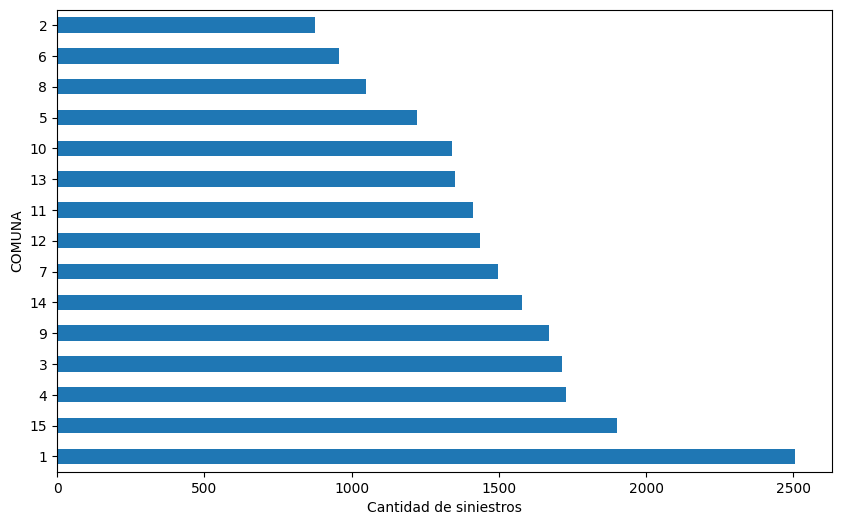

In [200]:
conteo_comuna = lesiones_hechos['comuna'].value_counts()
plt.figure(figsize=(10, 6))
conteo_comuna.plot(kind='barh')
plt.xlabel('Cantidad de siniestros')
plt.ylabel('COMUNA')
plt.show()

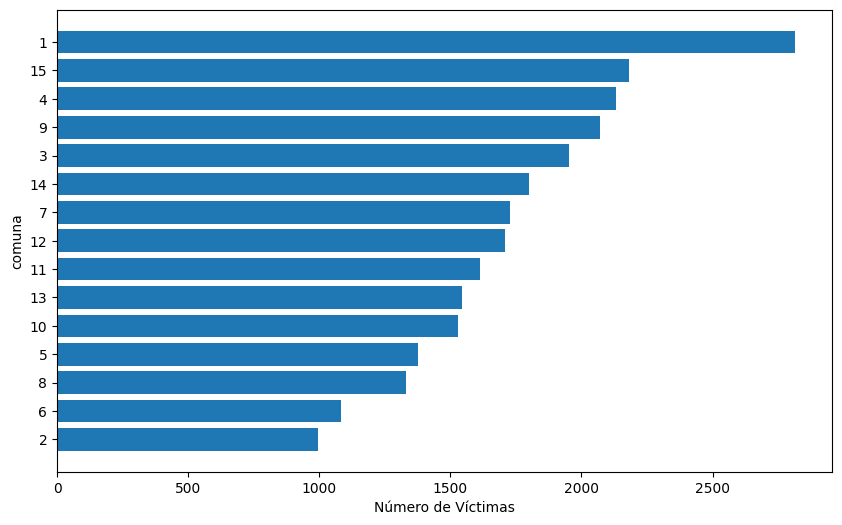

In [201]:
lesiones_hechos_copia = lesiones_hechos.copy()
lesiones_hechos_copia['n_victimas'] = pd.to_numeric(lesiones_hechos_copia['n_victimas'], errors='coerce')
lesiones_hechos_copia = lesiones_hechos_copia.dropna(subset=['n_victimas'])
lesiones_hechos_copia['comuna'] = lesiones_hechos_copia['comuna'].astype(str)
comuna_victimas = lesiones_hechos_copia.groupby('comuna')['n_victimas'].sum()
comuna_victimas_sorted = comuna_victimas.sort_values(ascending=False)

plt.figure(figsize=(10, 6)) 
plt.barh(comuna_victimas_sorted.index[::-1], comuna_victimas_sorted.values[::-1])
plt.xlabel('Número de Víctimas')
plt.ylabel('comuna')
plt.show()

In [202]:
lesiones_hechos.to_excel('Data/Data_procesada/lesiones_hechos.xlsx', index=False)

In [203]:
homicidios_hechos

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,TIPO_DE_CALLE,COMUNA,Longitud,Latitud,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS
4,2016-0008,1,2016-01-24,2016,1,24,18:30:00,18,AVENIDA,8,-58.444513,-34.684759,MOTO-OBJETO FIJO,MOTO,OBJETO FIJO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AVENIDA,7,-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
655,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AUTOPISTA,9,-58.467398,-34.651178,MOTO-AUTO,MOTO,AUTO
656,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AVENIDA,11,-58.472934,-34.619847,MOTO-CARGAS,MOTO,CARGAS
657,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AVENIDA,9,-58.470668,-34.650217,AUTO-CARGAS,AUTO,CARGAS
